<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/EE-769-Introduction-to-Machine-Learning/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment details

Assignment number: 2 

Course: EE 769 (Introduction to Machine Learning)

Instructor: [Prof. Amit Sethi](https://www.ee.iitb.ac.in/~asethi/)

Student name: Tejas Chaudhari

Student roll number: 10D110017


# Assignment questions
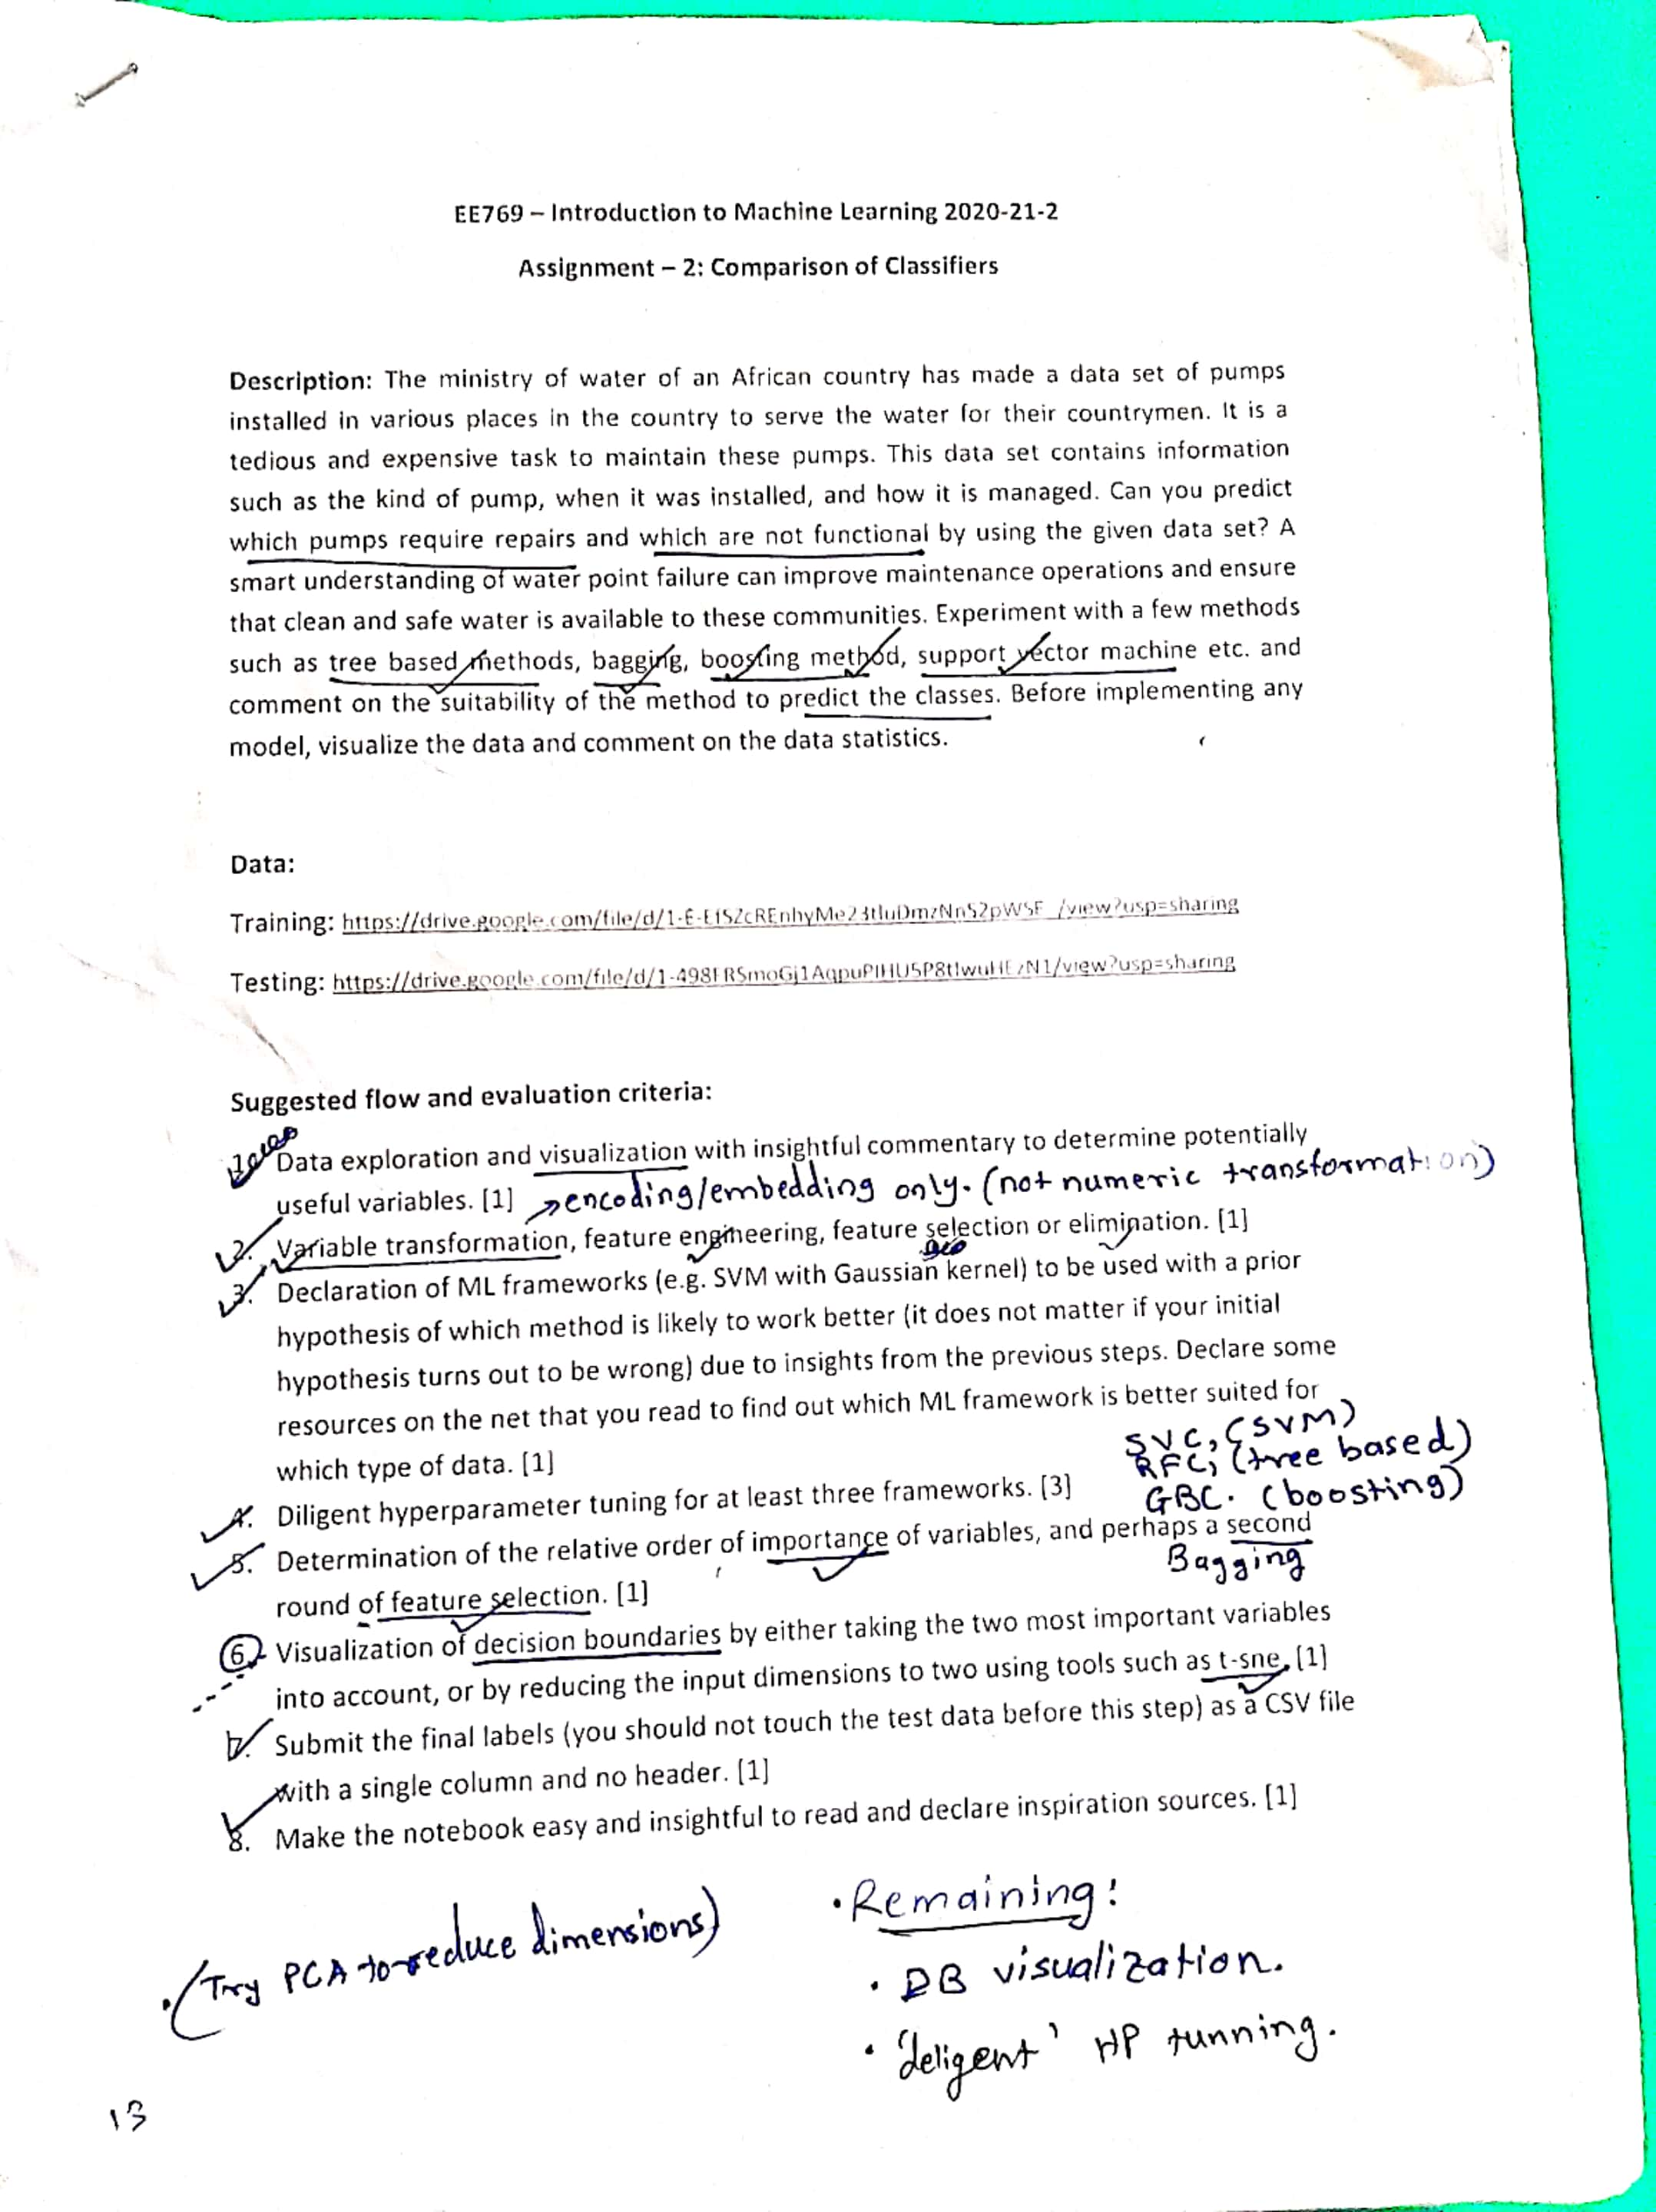

# Libraries

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from pprint import pprint
from collections import OrderedDict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRFClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE

Useful resources:
1. https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#3149

'Feature Split' method is to be used for 'date_recorded' column in the data.


2. Decision boundary visualization - https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508

Issues faced:
1. Encoding of categorical variables (when number of categories,i.e., unique values is large)
2. Correlation between categorical variables

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9


https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365#:~:text=The%20point%20biserial%20correlation%20is,a%20continuous%20and%20categorical%20variable.&text=Additionally%2C%20it%20can%20also%20help,the%20categorical%20and%20continuous%20variables.

3. Standardization of categorical variables


# Upload files

In [ ]:
# from google.colab import files  # Colab-specific library to load files

# # Upload both train and test files
# uploaded_files = files.upload()  # Its a dictionary with file names as keys 

# # Print name and size of uploaded files for confirmation
# for file_name in uploaded_files.keys():
#   file_size = len(uploaded_files[file_name])
#   print(f'You have uploaded file {file_name} with {round(file_size/10**6, 3)} MB')

# Preliminary data processing

## Read data

In [ ]:
# Read test data as pandas dataframe
as_read_seen_data_df = pd.read_csv('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/Train.csv', delimiter=',') # Data with target

# Display as read training data
print('As read seen data (data with target): ')
display(as_read_seen_data_df)
print('--'*100)

# Read test data
# as_read_unseen_data_df = pd.read_csv('/content/test.csv') # data without target

# Display as read test data
# print('As read unseen data without target (data without target): ')
# display(as_read_seen_data_df)
# print('--'*100)

As read seen data (data with target): 


id  amount_tsh  ... waterpoint_type_group    status_group
0       7411         7.0  ...    communal standpipe      functional
1      18014         0.0  ...    communal standpipe      functional
2      26103         0.0  ...    communal standpipe  non functional
3      31140         0.0  ...    communal standpipe      functional
4      12286       300.0  ...    communal standpipe      functional
...      ...         ...  ...                   ...             ...
44545  43878         0.0  ...             hand pump      functional
44546  50718         0.0  ...             hand pump  non functional
44547  67177         0.0  ...    communal standpipe      functional
44548   2744       200.0  ...    communal standpipe      functional
44549  10262         0.0  ...             hand pump      functional

[44550 rows x 41 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Observations:
1. Test data has additional unnamed column but still number of columns is same (41) in both train and test data.

## Data types

In [ ]:
as_read_seen_data_df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [ ]:
as_read_seen_data_df.dtypes.value_counts()

object     31
int64       7
float64     3
dtype: int64

Observations:
1. 31 categorical(string/object) columns (30 input and 1 target)
2. 7 numerical integral columns (all input)
3. 3 numerical decimal columns (all input)

### Store numerical as read data

In [ ]:
numerical_as_read_seen_data_df = as_read_seen_data_df.select_dtypes(include=['int64','float64'])
display(numerical_as_read_seen_data_df)

id  amount_tsh  ...  population  construction_year
0       7411         7.0  ...          90               2008
1      18014         0.0  ...          70               1984
2      26103         0.0  ...         150               2002
3      31140         0.0  ...           0                  0
4      12286       300.0  ...          34               2007
...      ...         ...  ...         ...                ...
44545  43878         0.0  ...           0                  0
44546  50718         0.0  ...           0                  0
44547  67177         0.0  ...          60               1977
44548   2744       200.0  ...          80               2011
44549  10262         0.0  ...           0                  0

[44550 rows x 10 columns]

### Stire as read categorical data


In [ ]:
categorical_as_read_seen_data_df = as_read_seen_data_df.select_dtypes(include='object')
display(categorical_as_read_seen_data_df)

date_recorded  ...    status_group
0        2013-03-20  ...      functional
1        2011-02-21  ...      functional
2        2013-01-04  ...  non functional
3        2011-04-03  ...      functional
4        2013-03-08  ...      functional
...             ...  ...             ...
44545    2013-01-23  ...      functional
44546    2011-07-25  ...  non functional
44547    2013-02-23  ...      functional
44548    2013-03-26  ...      functional
44549    2013-01-26  ...      functional

[44550 rows x 31 columns]

## Unique values

#### Int columns

In [ ]:
# Check if the int columns are discrete or continuous
as_read_seen_data_df.select_dtypes('int64').nunique()

id                   44550
gps_height            2396
num_private             59
region_code             27
district_code           20
population             956
construction_year       55
dtype: int64

Observations:
1. All integral numerical columns have sufficient number of unique values for them to be considered as continuous.

##### Histogram

#### Float columns

In [ ]:
as_read_seen_data_df.select_dtypes('float64').nunique()

amount_tsh       85
longitude     43155
latitude      43155
dtype: int64

#### Object columns

In [ ]:
as_read_seen_data_df.select_dtypes('object').nunique()

date_recorded              346
funder                    1651
installer                 1854
wpt_name                 28991
basin                        9
subvillage               16617
region                      21
lga                        125
ward                      2080
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2506
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

Observations:
1. Some categorical variables have too many unique values. It will be challenging to encode using one-hot-bit encoding.
2. Target column 'status_group' has 3 values.
3. 'recorded_by' has only 1 unique value so its not indicative of any target class. Drop it.

In [ ]:
as_read_seen_data_df['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

Observations:
1. We have 3 target classes: 'functional', 'non functional', and 'functional needs repair'.

In [ ]:
# Categorical variables
as_read_seen_data_df.select_dtypes('object')

date_recorded  ...    status_group
0        2013-03-20  ...      functional
1        2011-02-21  ...      functional
2        2013-01-04  ...  non functional
3        2011-04-03  ...      functional
4        2013-03-08  ...      functional
...             ...  ...             ...
44545    2013-01-23  ...      functional
44546    2011-07-25  ...  non functional
44547    2013-02-23  ...      functional
44548    2013-03-26  ...      functional
44549    2013-01-26  ...      functional

[44550 rows x 31 columns]

Observations:
1. Following features (given unique values in ()) look similar :

extraction_type (18), extraction_type_group (13), extraction_type_class (7)

management (12), management_group (5)

payment (7), payment_type (7)

water_quality (8), quality_group (6)

quantity (5), quantity_group (5)

source (10), source_type (7), source_class (3)

waterpoint_type (7), waterpoint_type_group (6)

Next:
1. Lets select the features in each group with less number of unique values to avoid exposion of features in one-hot encoding later.

In [ ]:
# Create a dictionary to keep a track of columns to drop or modify
columns_to_drop_in_seen_data_dict = OrderedDict()
columns_to_drop_in_seen_data_dict['Similar features'] = ['extraction_type', 'extraction_type_group', 'management', 'payment', 
                                                          'water_quality', 'quantity', 'source', 'source_type', 'waterpoint_type']

# Drop the columns
reduced_seen_data_v1_df = as_read_seen_data_df.drop(columns=columns_to_drop_in_seen_data_dict['Similar features'])

# Drop id column 
columns_to_drop_in_seen_data_dict['IDs'] = ['id']

# Drop the id column
reduced_seen_data_v2_df = reduced_seen_data_v1_df.drop(columns=columns_to_drop_in_seen_data_dict['IDs'])

# Display the reduced df
display(reduced_seen_data_v2_df)

# Store columns with only 1 unique value
columns_to_drop_in_seen_data_dict['Only 1 unique value'] = ['recorded_by']

# Drop column with only 1 unique value
reduced_seen_data_v3_df = reduced_seen_data_v2_df.drop(columns=columns_to_drop_in_seen_data_dict['Only 1 unique value'])

# Display 
display(reduced_seen_data_v3_df)


amount_tsh date_recorded  ... waterpoint_type_group    status_group
0             7.0    2013-03-20  ...    communal standpipe      functional
1             0.0    2011-02-21  ...    communal standpipe      functional
2             0.0    2013-01-04  ...    communal standpipe  non functional
3             0.0    2011-04-03  ...    communal standpipe      functional
4           300.0    2013-03-08  ...    communal standpipe      functional
...           ...           ...  ...                   ...             ...
44545         0.0    2013-01-23  ...             hand pump      functional
44546         0.0    2011-07-25  ...             hand pump  non functional
44547         0.0    2013-02-23  ...    communal standpipe      functional
44548       200.0    2013-03-26  ...    communal standpipe      functional
44549         0.0    2013-01-26  ...             hand pump      functional

[44550 rows x 31 columns]

amount_tsh date_recorded  ... waterpoint_type_group    status_group
0             7.0    2013-03-20  ...    communal standpipe      functional
1             0.0    2011-02-21  ...    communal standpipe      functional
2             0.0    2013-01-04  ...    communal standpipe  non functional
3             0.0    2011-04-03  ...    communal standpipe      functional
4           300.0    2013-03-08  ...    communal standpipe      functional
...           ...           ...  ...                   ...             ...
44545         0.0    2013-01-23  ...             hand pump      functional
44546         0.0    2011-07-25  ...             hand pump  non functional
44547         0.0    2013-02-23  ...    communal standpipe      functional
44548       200.0    2013-03-26  ...    communal standpipe      functional
44549         0.0    2013-01-26  ...             hand pump      functional

[44550 rows x 30 columns]

In [ ]:
# Check if 2 columns are equal
display(as_read_seen_data_df['quantity'].equals(as_read_seen_data_df['quantity_group']))
print('--'*50)

# Get number of equal and unequal values
as_read_seen_data_df['quantity'].eq(as_read_seen_data_df['quantity_group']).value_counts()

True

----------------------------------------------------------------------------------------------------


True    44550
dtype: int64

Observations:
1. 'quantity' and 'quantity_group' are exactly same. 'quantity' is already added to the dictionary of columns to drop under 'Similar features' key.

##### Use 'feature split' on 'date_recorded' column

In [ ]:
# Initiate the dataframe to store created columns by splitting 'date_recorded'
date_recorded_seen_data_split_df = pd.DataFrame(columns=['Year', 'Month', 'Date'])

# Split the 'date' recorded column 
date_recorded_seen_data_split_df[['Year', 'Month', 'Date']] = as_read_seen_data_df['date_recorded'].str.split('-', expand=True).astype('int64')

# Display the dataframe
display(date_recorded_seen_data_split_df)
print('--'*100)

# Check data types of the created dataframe
display(date_recorded_seen_data_split_df[['Year', 'Month', 'Date']].dtypes)
print('--'*100)

# Store the modification in dictionary of columns to drop
columns_to_drop_in_seen_data_dict['Modified date_recorded'] = date_recorded_seen_data_split_df 

# Add the columns to reduced seen dataframe and drop 'date_recorded'
reduced_seen_data_v4_df = pd.concat([reduced_seen_data_v3_df, date_recorded_seen_data_split_df], axis=1).drop(columns='date_recorded')

# Display reduced seen data version
display(reduced_seen_data_v4_df)

Year  Month  Date
0      2013      3    20
1      2011      2    21
2      2013      1     4
3      2011      4     3
4      2013      3     8
...     ...    ...   ...
44545  2013      1    23
44546  2011      7    25
44547  2013      2    23
44548  2013      3    26
44549  2013      1    26

[44550 rows x 3 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Year     int64
Month    int64
Date     int64
dtype: object

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


amount_tsh                  funder  gps_height  ...  Year  Month  Date
0             7.0         Germany Republi        1203  ...  2013      3    20
1             0.0                    Cdtf        1409  ...  2011      2    21
2             0.0  Government Of Tanzania        1572  ...  2013      1     4
3             0.0        District Council           0  ...  2011      4     3
4           300.0        District Council        1283  ...  2013      3     8
...           ...                     ...         ...  ...   ...    ...   ...
44545         0.0            World Vision           0  ...  2013      1    23
44546         0.0                     Ded           0  ...  2011      7    25
44547         0.0  Government Of Tanzania         969  ...  2013      2    23
44548       200.0                    Adra        1269  ...  2013      3    26
44549         0.0            World Vision           0  ...  2013      1    26

[44550 rows x 32 columns]

In [ ]:
reduced_seen_data_v4_df.select_dtypes('object').nunique()

funder                    1651
installer                 1854
wpt_name                 28991
basin                        9
subvillage               16617
region                      21
lga                        125
ward                      2080
public_meeting               2
scheme_management           12
scheme_name               2506
permit                       2
extraction_type_class        7
management_group             5
payment_type                 7
quality_group                6
quantity_group               5
source_class                 3
waterpoint_type_group        6
status_group                 3
dtype: int64

## Mising values

### Missing values in Seen data

In [ ]:
print('Number of missing values in columns: ')
display(as_read_seen_data_df.isna().sum())
print('--'*50)

print('Number of columns with missing values:')
display(as_read_seen_data_df.isna().any().sum())
print('--'*50)

print('Columns with missing values:')
display(as_read_seen_data_df.columns[as_read_seen_data_df.isna().any()])

Number of missing values in columns: 


id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

----------------------------------------------------------------------------------------------------
Number of columns with missing values:


7

----------------------------------------------------------------------------------------------------
Columns with missing values:


Index(['funder', 'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')

### Data types of columns with missing values in seen data

In [ ]:
print('Data types of columns with missing values:')
display(as_read_seen_data_df.loc[:,as_read_seen_data_df.isna().any().to_list()].dtypes)
print('--'*50)

print('Counts of data types of columns with missing values:')
display(as_read_seen_data_df.loc[:,as_read_seen_data_df.isna().any().to_list()].dtypes.value_counts())

Data types of columns with missing values:


funder               object
installer            object
subvillage           object
public_meeting       object
scheme_management    object
scheme_name          object
permit               object
dtype: object

----------------------------------------------------------------------------------------------------
Counts of data types of columns with missing values:


object    7
dtype: int64

Observations:
1. All 7 columns with missing values are categorical (string/object data type).

### Missing values table function

In [ ]:
# Source code of missing values table function - https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction 
def missing_values_table(df):
        # Total missing values
        n_mising_values_list = df.isnull().sum()
        
        # Percentage of missing values
        missing_values_percent_list = 100 * df.isnull().sum() / len(df) # len(df) is total number of rows
        
        # Make a table with the results
        missing_values_table = pd.concat([n_mising_values_list, missing_values_percent_list], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = missing_values_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Missing Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(as_read_seen_data_df)

Your selected dataframe has 41 columns.
There are 7 columns that have missing values.


Missing Values  % of Missing Values
scheme_name                 21110                 47.4
scheme_management            2832                  6.4
installer                    2807                  6.3
funder                       2793                  6.3
public_meeting               2491                  5.6
permit                       2336                  5.2
subvillage                    287                  0.6

Observations:
1. 47% values in 'scheme_name' column are missing. It may be dropped.

## Missing values imputation

### Drop columns ('scheme_name') with high % missing values

In [ ]:
# Drop columns with high %  values and initialize imputed seen dataframe
columns_to_drop_in_seen_data_dict['Features with high % missing values'] = ['scheme_name']

# Drop the column and store in reduced seen data v3
reduced_seen_data_v5_df = reduced_seen_data_v4_df.drop(columns=columns_to_drop_in_seen_data_dict['Features with high % missing values'], inplace=False)

# Display reduced data
display(reduced_seen_data_v5_df)

amount_tsh                  funder  gps_height  ...  Year  Month  Date
0             7.0         Germany Republi        1203  ...  2013      3    20
1             0.0                    Cdtf        1409  ...  2011      2    21
2             0.0  Government Of Tanzania        1572  ...  2013      1     4
3             0.0        District Council           0  ...  2011      4     3
4           300.0        District Council        1283  ...  2013      3     8
...           ...                     ...         ...  ...   ...    ...   ...
44545         0.0            World Vision           0  ...  2013      1    23
44546         0.0                     Ded           0  ...  2011      7    25
44547         0.0  Government Of Tanzania         969  ...  2013      2    23
44548       200.0                    Adra        1269  ...  2013      3    26
44549         0.0            World Vision           0  ...  2013      1    26

[44550 rows x 31 columns]

### Imputation using mode (univariate)

Pros:
1. Works well with categorical features.


Cons:
1. It also doesn’t factor the correlations between features.
2. It can introduce bias in the data.

In [ ]:
# Create imputer instance from the imported class
mode_imputer_model = SimpleImputer(strategy='most_frequent')

# Fit the imputer model using seen data
fitted_seen_data_mode_imputer_model = mode_imputer_model.fit(as_read_seen_data_df)

# Perform imputation
imputed_seen_data_array = fitted_seen_data_mode_imputer_model.transform(as_read_seen_data_df)

# Convert to pandas dataframe
imputed_seen_data_df = pd.DataFrame(imputed_seen_data_array, columns=as_read_seen_data_df.columns)

# Confirmation
missing_values_table(imputed_seen_data_df)

# Save imputer model to use it on unseen data later
save_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/fitted_seen_data_mode_imputer_model.joblib'
dump(fitted_seen_data_mode_imputer_model, save_path)

Your selected dataframe has 41 columns.
There are 0 columns that have missing values.


['/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/fitted_seen_data_mode_imputer_model.joblib']

## Encoding (Categorical variable transformation)

Useful resources:
1. https://towardsdatascience.com/catalog-of-variable-transformations-to-make-your-model-works-better-7b506bf80b97
2. https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
3. https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159
4. https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63 (Feature hashing)
5. https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#3149 (feature split)
6. https://booking.ai/dont-be-tricked-by-the-hashing-trick-192a6aae3087 (feature hashing)
7. https://www.kaggle.com/subinium/11-categorical-encoders-and-benchmark

### Using one-hot encoding (failed attempt)

In [ ]:
# Create encoder model instance from the imported class
# one_hot_encoder_model = OneHotEncoder(sparse=True)

# Fit the encoder model on seen data
# fitted_seen_data_one_hot_encoder_model = one_hot_encoder_model.fit(imputed_seen_data_df)

# Perform encoding on the seen data
# encoded_seen_data_array = fitted_seen_data_one_hot_encoder_model.transform(imputed_seen_data_df)
# display(encoded_seen_data_array)

# Convert to pandas dataframe
# encoded_seen_data_df = pd.DataFrame(encoded_seen_data_array, columns=imputed_seen_data_df.columns)

# Confirmation
# display(encoded_seen_data_df.dtypes.value_counts())

## Encoding on reduced imputed data

### Store reduced and imputed data

In [ ]:
# Initiate reduced and imputed dataframe
reduced_imputed_seen_data_df =  reduced_seen_data_v5_df.copy(deep=True) # Modificationns are independent
reduced_imputed_seen_data_df.update(imputed_seen_data_df)

# Display
display(reduced_imputed_seen_data_df)
print('--'*100)

# Display object columns
display(reduced_imputed_seen_data_df.select_dtypes('object'))
print('--'*50)

# Confirmation of missing values
print('Number of columns with missing values: ')
reduced_imputed_seen_data_df.isna().any().sum()

amount_tsh                  funder gps_height  ...  Year Month Date
0              7         Germany Republi       1203  ...  2013     3   20
1              0                    Cdtf       1409  ...  2011     2   21
2              0  Government Of Tanzania       1572  ...  2013     1    4
3              0        District Council          0  ...  2011     4    3
4            300        District Council       1283  ...  2013     3    8
...          ...                     ...        ...  ...   ...   ...  ...
44545          0            World Vision          0  ...  2013     1   23
44546          0                     Ded          0  ...  2011     7   25
44547          0  Government Of Tanzania        969  ...  2013     2   23
44548        200                    Adra       1269  ...  2013     3   26
44549          0            World Vision          0  ...  2013     1   26

[44550 rows x 31 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


amount_tsh                  funder  ... waterpoint_type_group    status_group
0              7         Germany Republi  ...    communal standpipe      functional
1              0                    Cdtf  ...    communal standpipe      functional
2              0  Government Of Tanzania  ...    communal standpipe  non functional
3              0        District Council  ...    communal standpipe      functional
4            300        District Council  ...    communal standpipe      functional
...          ...                     ...  ...                   ...             ...
44545          0            World Vision  ...             hand pump      functional
44546          0                     Ded  ...             hand pump  non functional
44547          0  Government Of Tanzania  ...    communal standpipe      functional
44548        200                    Adra  ...    communal standpipe      functional
44549          0            World Vision  ...             hand pump      functional

[44550 rows x 28 columns]

----------------------------------------------------------------------------------------------------
Number of columns with missing values: 


0

Observations:
1. The reduced and imputed data has 33 features out of which 30 features are categorical (of object data type).

In [ ]:
# Check unique values in object columns
reduced_imputed_seen_data_df.select_dtypes('object').nunique()

amount_tsh                  85
funder                    1651
gps_height                2396
installer                 1854
longitude                43155
latitude                 43155
wpt_name                 28991
num_private                 59
basin                        9
subvillage               16617
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2080
population                 956
public_meeting               2
scheme_management           12
permit                       2
construction_year           55
extraction_type_class        7
management_group             5
payment_type                 7
quality_group                6
quantity_group               5
source_class                 3
waterpoint_type_group        6
status_group                 3
dtype: int64

### One hot encoding on columns with less number of unique values (discarded)

In [ ]:
# # Set maximum number of unique values in column for deciding whether to one hot encode
# max_n_unique_for_one_hot_encoding = 60

# # List for storing columns on which one hot encoding is to be performed
# columns_for_one_hot_encoding_list = []

# # Get list of columns on which one hot encoding is to be performed
# for i, column_name in enumerate(reduced_imputed_seen_data_df.select_dtypes('object').columns):
#     if reduced_imputed_seen_data_df[column_name].nunique() <= max_n_unique_for_one_hot_encoding:
#         columns_for_one_hot_encoding_list.append(column_name)

# # Remove target from the list if it exists in it as for target we use label encoding
# if 'status_group' in columns_for_one_hot_encoding_list:
#     columns_for_one_hot_encoding_list.remove('status_group')

#  # Perform one hot encoding
# encoded_seen_data_v1_df = pd.get_dummies(reduced_imputed_seen_data_df, columns=columns_for_one_hot_encoding_list)

# display(encoded_seen_data_v1_df)

In [ ]:
# Check number of categorical features left to encode
# encoded_seen_data_v2_df.dtypes.value_counts()

Note:
1. Above method to encode columns with less number of unique values with one-hot and high number of values with ordinal is not explained properly and not a good choice. Hence it was discarded and feature elimination based on correlations is to be performed before further encoding.

## Feature selection based on correlation

Useful resources:
1. https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9 (used functions in this report)

2. https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365#:~:text=The%20point%20biserial%20correlation%20is,a%20continuous%20and%20categorical%20variable.&text=Additionally%2C%20it%20can%20also%20help,the%20categorical%20and%20continuous%20variables.

Note:
1. Logistic regression performance metric can be used to get correlation between a numerical and categorical variable.

### Function to calculate Cramer' V

Note:
1. symmetric (V(x,y)=V(y,x)) correlation between 2 categorical variables. 

In [ ]:
def cramers_v(x, y):
    """
    Source - https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))



### Categorical correlation heatmap based on cramer's V

In [ ]:
# Get categorical data in the as read seen data
categorical_as_read_seen_data_df = as_read_seen_data_df.select_dtypes('object')
categorical_as_read_seen_data_df.nunique()

date_recorded              346
funder                    1651
installer                 1854
wpt_name                 28991
basin                        9
subvillage               16617
region                      21
lga                        125
ward                      2080
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2506
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [ ]:
# Check cracmers V between any 2 features
cramers_v(categorical_as_read_seen_data_df['recorded_by'], categorical_as_read_seen_data_df['subvillage'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


nan

Observations:
1. No crash when getting correlation between 'wpt_name' and 'subvillage', the top 2 features with most number of unique variables.
2. Crashes if we find correlation of 'wqt_name' with itself. So add a condition in finding correlation matrix to set this to 1.
3. My desktop did not crash in above case.

In [ ]:
# Record start time
start_time = time.time()

# Get dataframe of categorical variables from reduced and imputed data
categorical_as_read_seen_data_df = as_read_seen_data_df.select_dtypes('object').loc[:, as_read_seen_data_df.select_dtypes('object').nunique() < 30e3] # selects all categorical features in this data

# Get number of categorical variables
n_categorical_variables_seen_data = len(categorical_as_read_seen_data_df.columns)

# Initialize cramers v array
cramers_v_array = np.empty((n_categorical_variables_seen_data, n_categorical_variables_seen_data))

# Calculate cramers V array
for i, left_column_name in enumerate(categorical_as_read_seen_data_df.columns):
    for j, right_column_name in enumerate(categorical_as_read_seen_data_df.columns):
        # Condition to avoid 'RuntimeWarning: invalid value encountered in double_scalars'
        if categorical_as_read_seen_data_df[left_column_name].nunique() == 1 or categorical_as_read_seen_data_df[right_column_name].nunique() == 1:
            cramers_v_array[i][j] = np.nan
        # Condition to save cinputational time and avoid cracsh in this data (see observation 2 above)
        elif left_column_name == right_column_name: 
            cramers_v_array[i][j] = 1
        else:
            cramers_v_array[i][j] = cramers_v(categorical_as_read_seen_data_df[left_column_name], categorical_as_read_seen_data_df[right_column_name])


# Convert cramers V array to dataframe
cramers_v_matrix = pd.DataFrame(cramers_v_array, columns=categorical_as_read_seen_data_df.columns, index=categorical_as_read_seen_data_df.columns)
display(cramers_v_matrix)
print('__'*100)

# Print time elapsed
print(f'Time elapsed in calculating crammers V matrix: {(time.time() - start_time)/60:.3f} minutes.')


In [ ]:
# Pickle cramers V matrix
cramers_v_matrix.to_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/cramers_v_matrix.pkl')


In [ ]:
# Load cramers v pickle 
cramers_v_matrix = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/cramers_v_matrix.pkl')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <a list of 31 Text major ticklabel objects>)

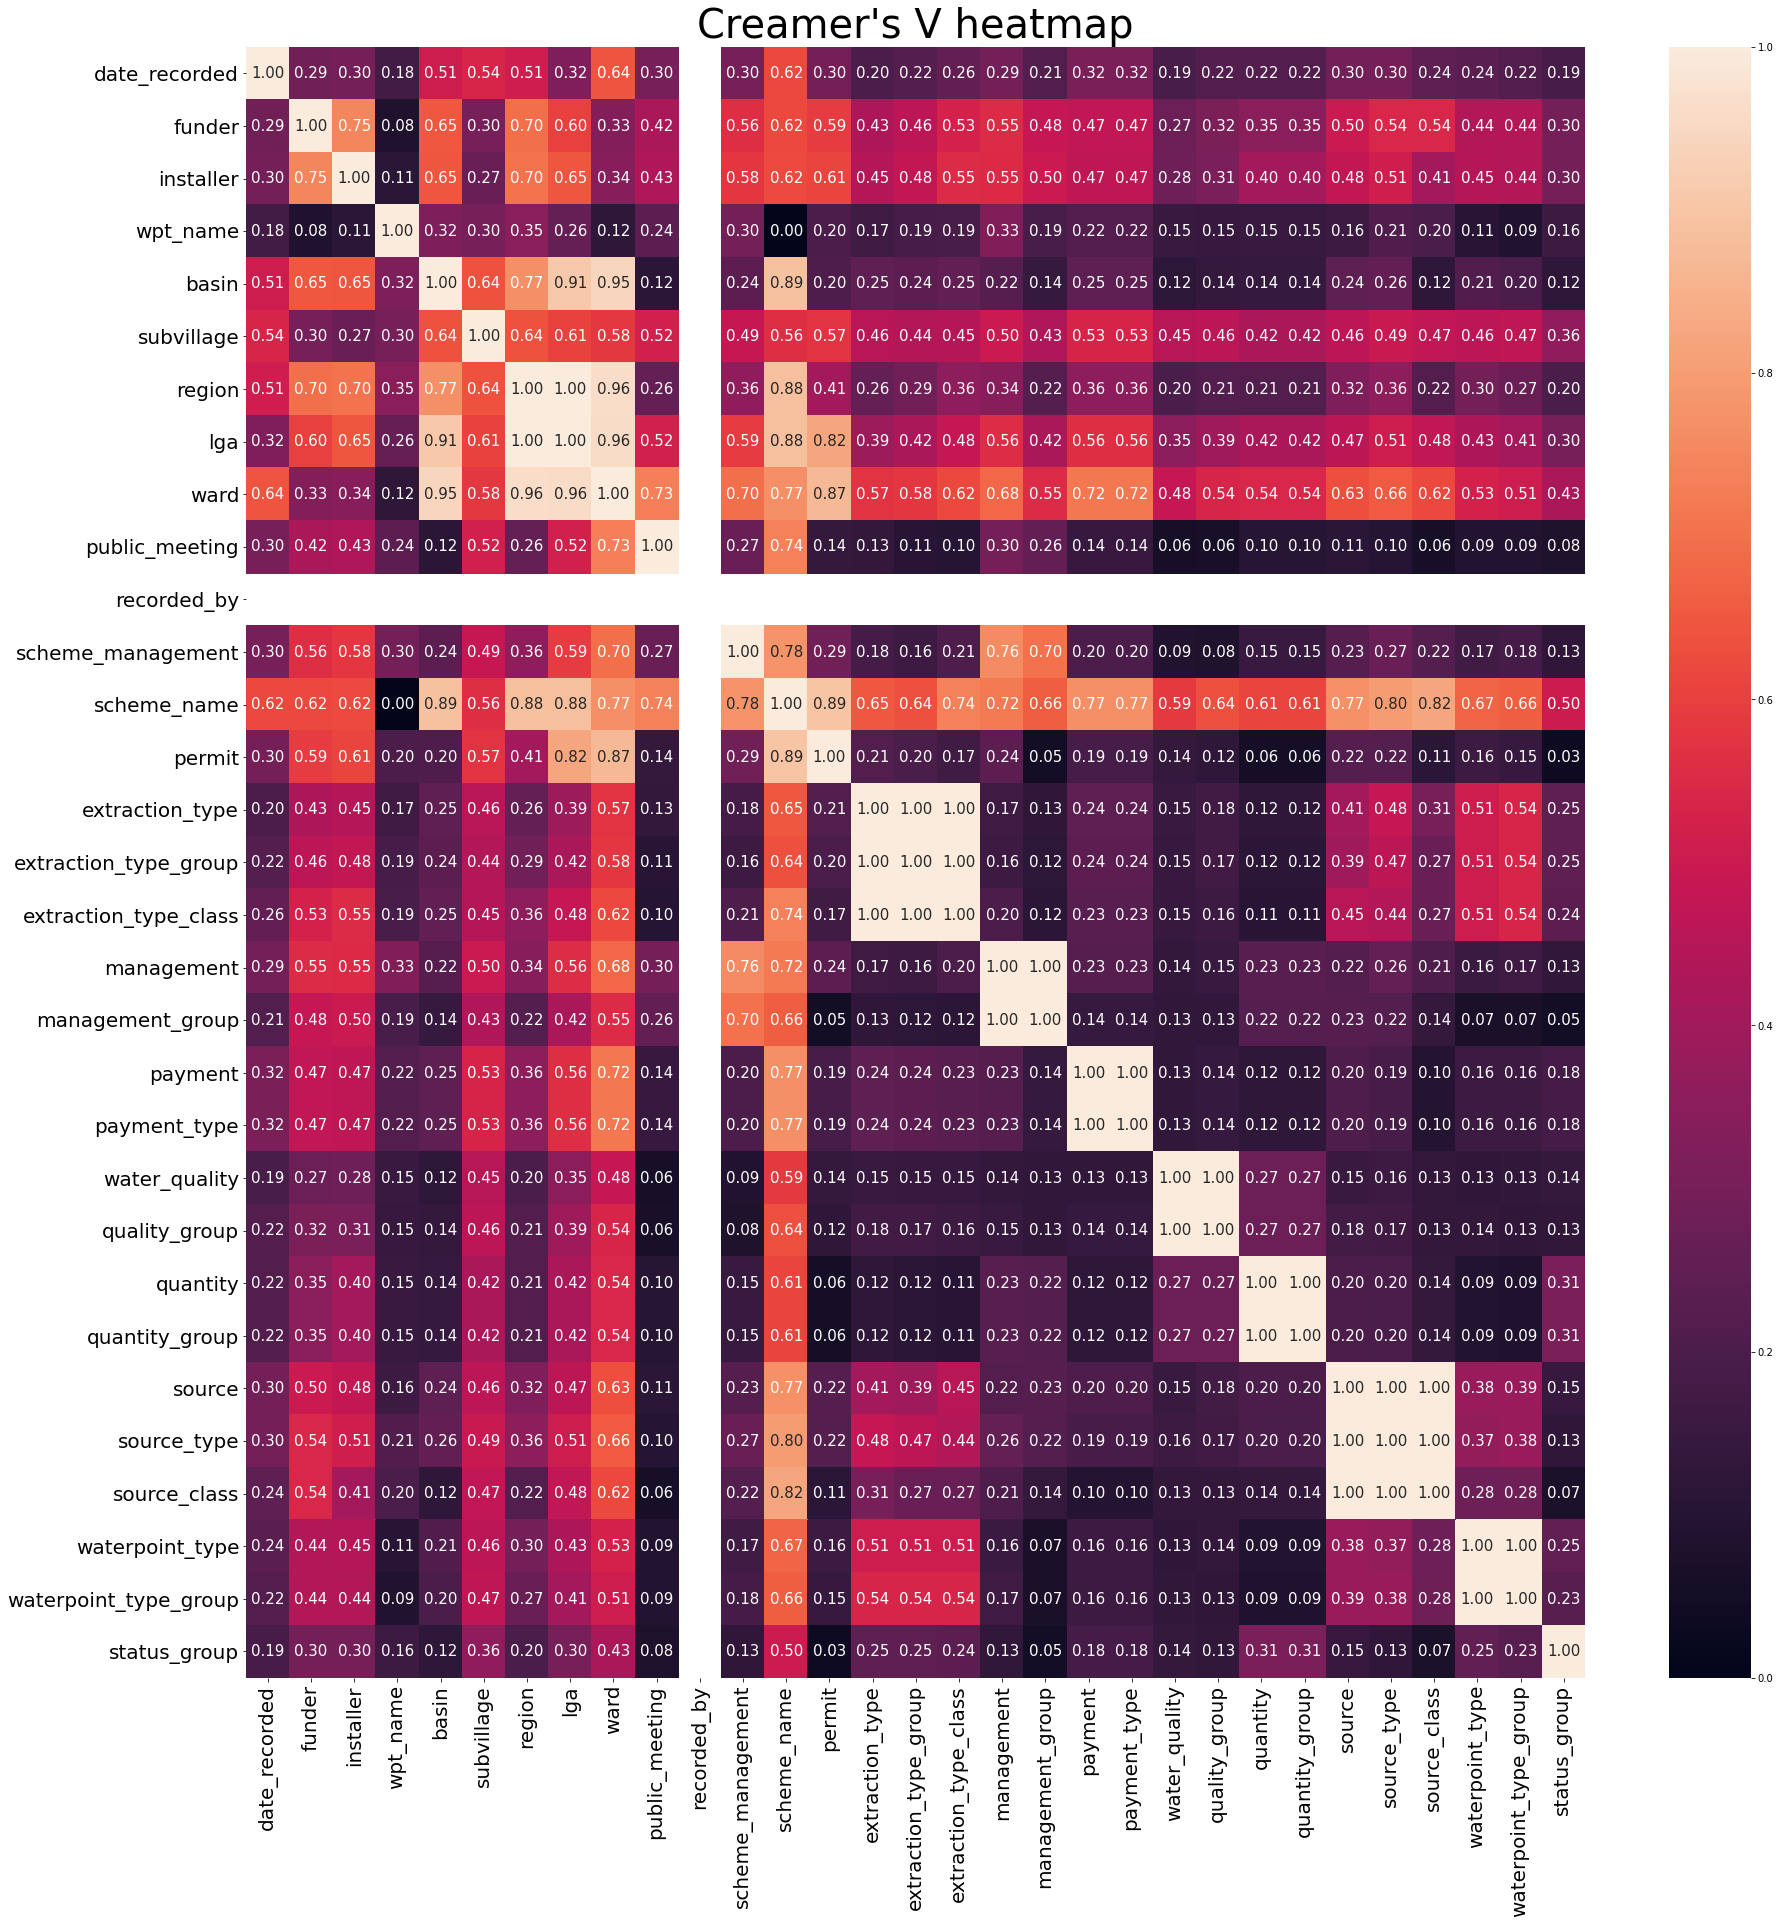

In [ ]:
# Plot heatmap
plt.figure(figsize=(30,30))
sns.heatmap(cramers_v_matrix, annot=True, fmt='.2f', annot_kws={'fontsize': 15})
plt.title("Creamer's V heatmap", fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


### Get correlated variables based on cramer's V

In [ ]:
# Initiate correlated variables set in the columns to drop dictionary
columns_to_drop_in_seen_data_dict['Correlated variables based on cramers V'] = set()

# Set max allowed correlation
max_allowed_cramers_V_correlation = 0.9

# Get the correlated variables
for i, diagonal_column_name in enumerate(cramers_v_matrix.columns):
    for j in range(0, i, 1): # Skip the diagonal column itself and all columns to its right
        if cramers_v_matrix.iloc[i,j] > max_allowed_cramers_V_correlation:
            print(f'{diagonal_column_name} is correlated with {cramers_v_matrix.columns[j]}')
            columns_to_drop_in_seen_data_dict['Correlated variables based on cramers V'].add(diagonal_column_name)

# Display
print('Correlated features based on cramers V:')
display(columns_to_drop_in_seen_data_dict['Correlated variables based on cramers V'])
print('--'*100)

# Get the updated reduced data
reduced_seen_data_v6_df = reduced_seen_data_v5_df.drop(columns=columns_to_drop_in_seen_data_dict['Correlated variables based on cramers V'], 
                                                       errors='ignore') # errors: If ‘ignore’, suppress error and only existing labels are dropped. 

# Display
print('Reduced data version 6:')
display(reduced_seen_data_v6_df)

lga is correlated with basin
lga is correlated with region
ward is correlated with basin
ward is correlated with region
ward is correlated with lga
extraction_type_group is correlated with extraction_type
extraction_type_class is correlated with extraction_type
extraction_type_class is correlated with extraction_type_group
management_group is correlated with management
payment_type is correlated with payment
quality_group is correlated with water_quality
quantity_group is correlated with quantity
source_type is correlated with source
source_class is correlated with source
source_class is correlated with source_type
waterpoint_type_group is correlated with waterpoint_type
Correlated features based on cramers V:


{'extraction_type_class',
 'extraction_type_group',
 'lga',
 'management_group',
 'payment_type',
 'quality_group',
 'quantity_group',
 'source_class',
 'source_type',
 'ward',
 'waterpoint_type_group'}

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reduced data version 6:


amount_tsh                  funder  gps_height  ...  Year  Month  Date
0             7.0         Germany Republi        1203  ...  2013      3    20
1             0.0                    Cdtf        1409  ...  2011      2    21
2             0.0  Government Of Tanzania        1572  ...  2013      1     4
3             0.0        District Council           0  ...  2011      4     3
4           300.0        District Council        1283  ...  2013      3     8
...           ...                     ...         ...  ...   ...    ...   ...
44545         0.0            World Vision           0  ...  2013      1    23
44546         0.0                     Ded           0  ...  2011      7    25
44547         0.0  Government Of Tanzania         969  ...  2013      2    23
44548       200.0                    Adra        1269  ...  2013      3    26
44549         0.0            World Vision           0  ...  2013      1    26

[44550 rows x 22 columns]

### Function to calculate Theil's U

1. symmetric (U(x,y)≠U(y,x)) correlation between 2 categorical variables. 

In [ ]:
def conditional_entropy(x,y):
    """
    source - https://www.kaggle.com/akshay22071995/alone-in-the-woods-using-theil-s-u-for-survival
    """
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theils_u(x,y):
    """
    source - https://www.kaggle.com/akshay22071995/alone-in-the-woods-using-theil-s-u-for-survival
    """
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

Note:
1.  Theil's U, also known as the Uncertainty Coefficient. Formaly marked as U(x|y), this coefficient provides a value in the range of [0,1], where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information abpout features x's value

### Correlation heatmap based on Theil's U

In [ ]:
# Record start time
start_time = time.time()

# Initialize cramers v array
theils_u_array = np.empty((n_categorical_variables_seen_data, n_categorical_variables_seen_data))

# Calculate cramers V array
for i, left_column_name in enumerate(categorical_as_read_seen_data_df.columns):
    for j, right_column_name in enumerate(categorical_as_read_seen_data_df.columns):
        if left_column_name == right_column_name: # Saves cinputational time and avoid cracsh in this data (see observation 2 above)
            theils_u_array[i][j] = 1
        else:
            theils_u_array[i][j] = theils_u(categorical_as_read_seen_data_df[left_column_name], categorical_as_read_seen_data_df[right_column_name])

# Convert cramers V array to dataframe
theils_u_matrix = pd.DataFrame(theils_u_array, columns=categorical_as_read_seen_data_df.columns, index=categorical_as_read_seen_data_df.columns)
display(theils_u_matrix)
print('__'*100)

# Print time elapsed
print(f'Time elapsed in calculating Theils U matrix: {(time.time() - start_time)/60:.3f} minutes.')

In [ ]:
# # Pickle theils u matrix
# theils_u_matrix.to_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/theils_u_matrix.pkl')


In [ ]:
# Load theils u matrix from pickle
theils_u_matrix = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/theils_u_matrix.pkl')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <a list of 31 Text major ticklabel objects>)

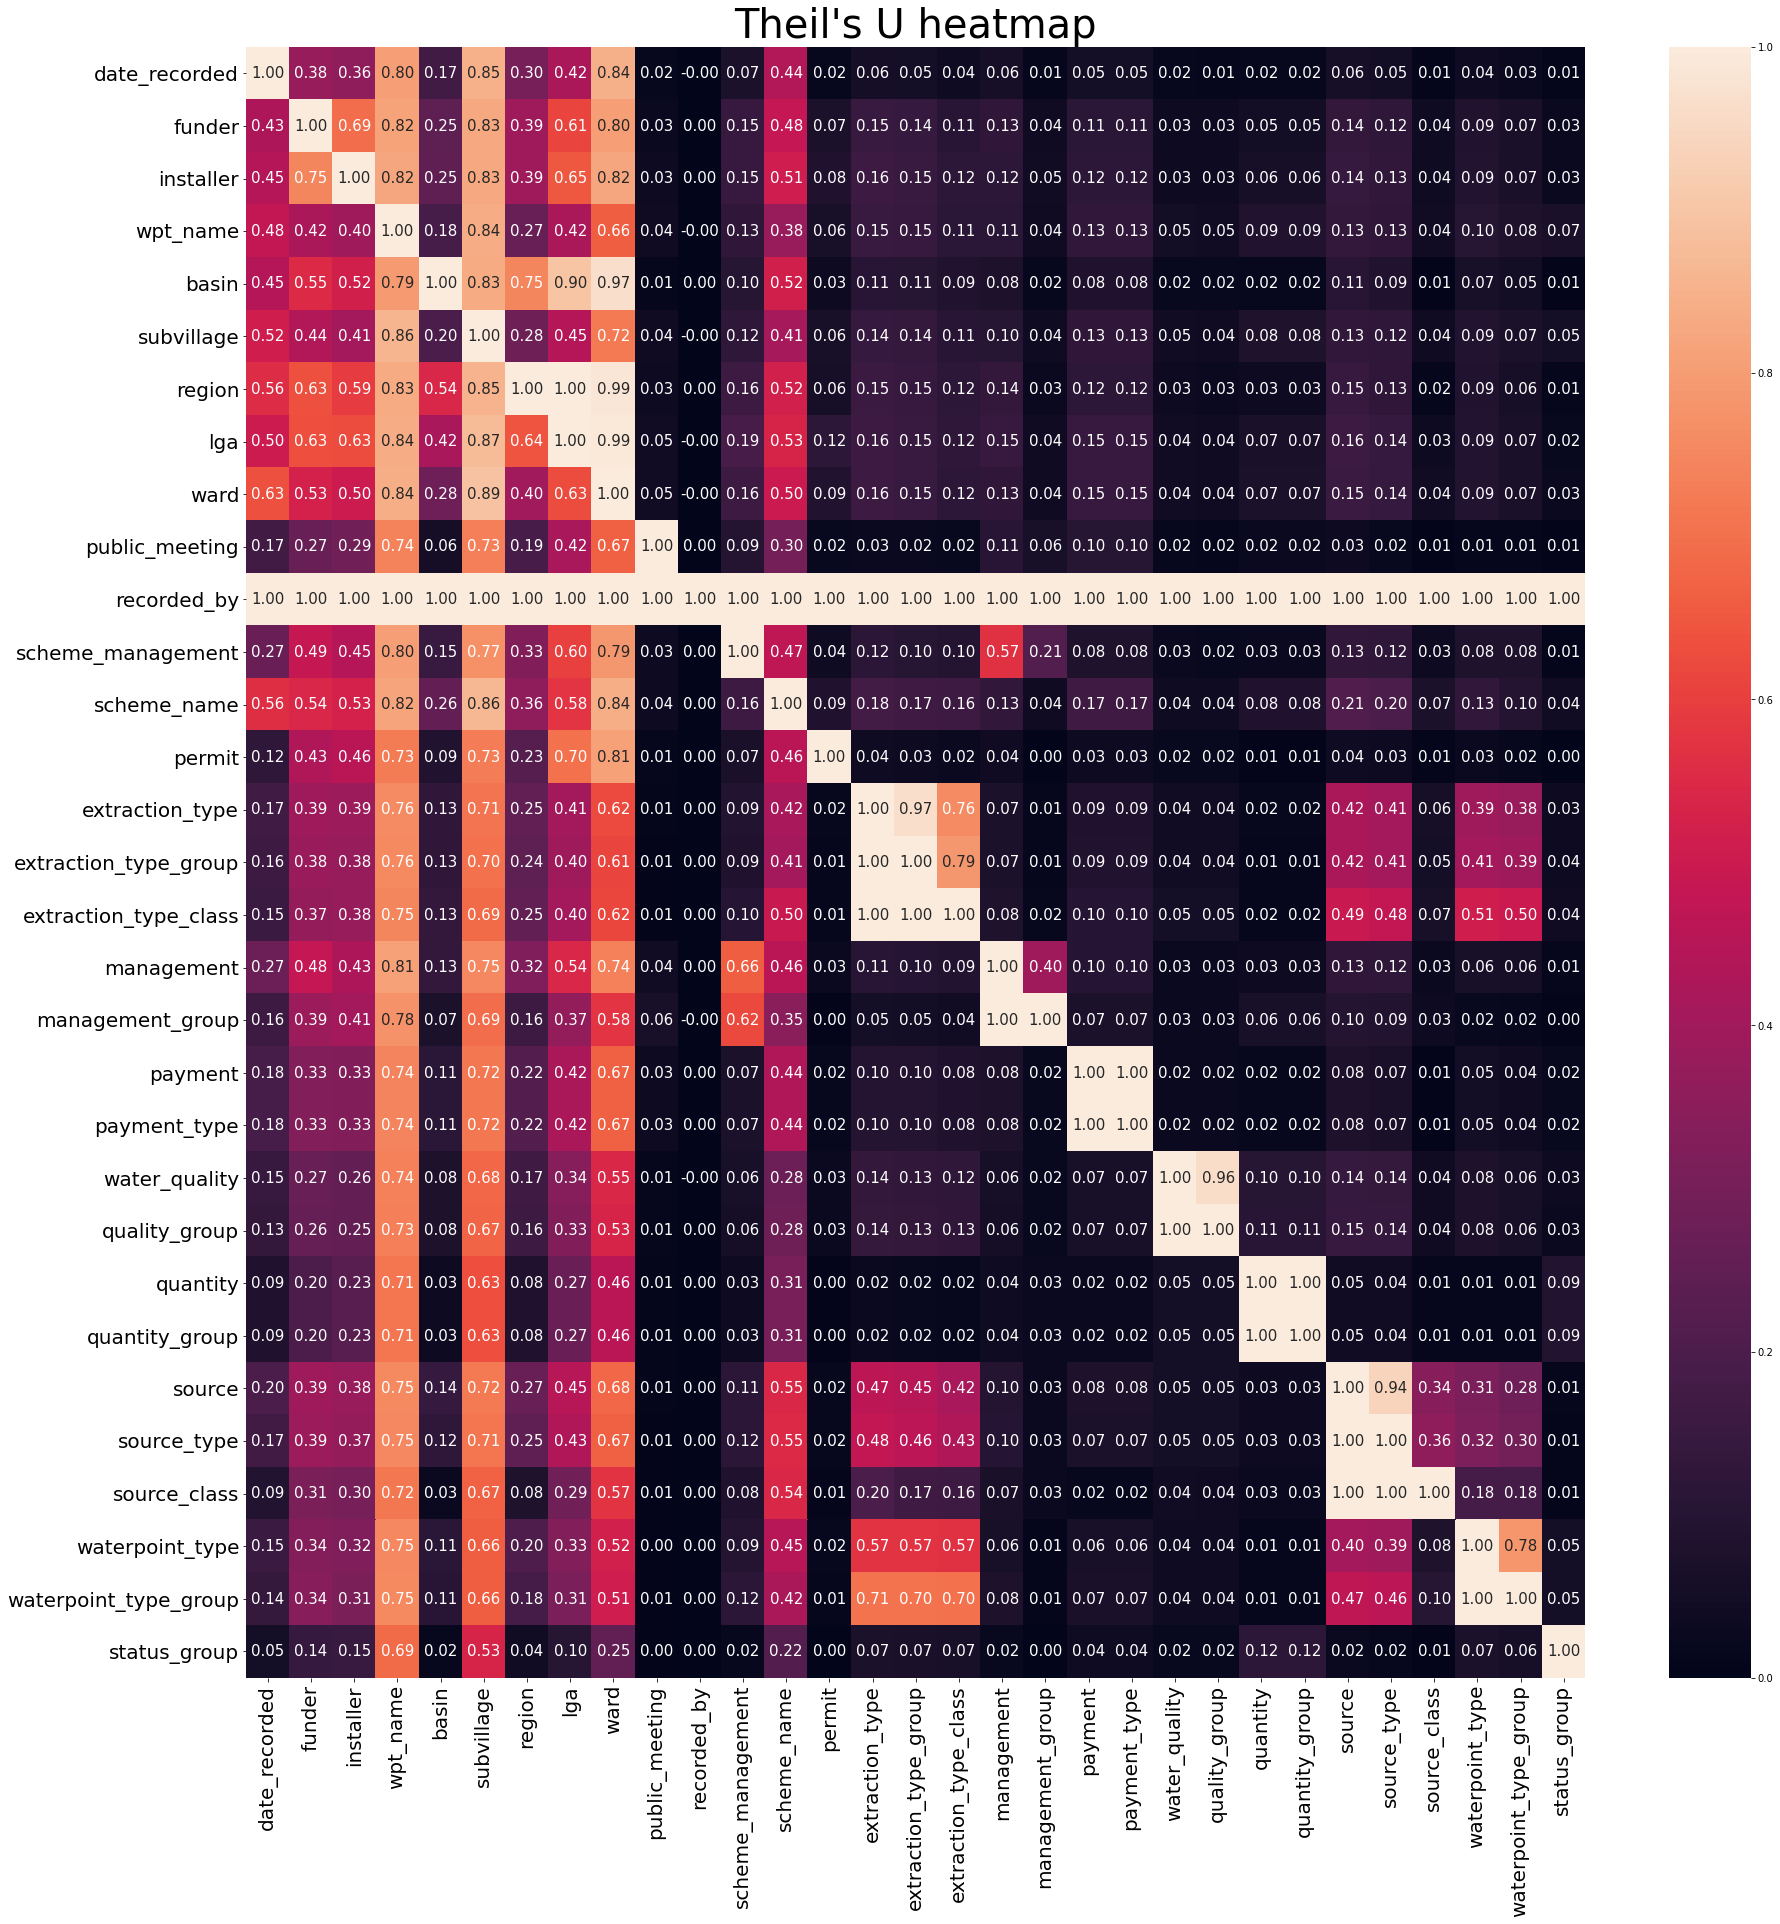

In [ ]:
# Plot heatmap
plt.figure(figsize=(30,30))
sns.heatmap(theils_u_matrix, annot=True, fmt='.2f', annot_kws={'fontsize': 15})
plt.title("Theil's U heatmap", fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Observations:
1. 'Basin' is dependent on 'ward' but 'ward' is not dependent on 'basin'

### Get correlated variables based on Theil's U

In [ ]:
# Initiate correlated variables set in the columns to drop dictionary
columns_to_drop_in_seen_data_dict['Correlated variables based on Theils U'] = set()

# Set max allowed correlation
max_allowed_theils_u_correlation = 0.9

# Get the correlated variables
for i, dependent_variable_name in enumerate(theils_u_matrix.columns):
    for j, given_variable_name in enumerate(theils_u_matrix.columns):
        if dependent_variable_name == given_variable_name: # Skip checking dependency with itself
            continue
        elif theils_u_matrix.iloc[i, j] > max_allowed_theils_u_correlation:
            print(f'{dependent_variable_name} is dependent on {given_variable_name}')
            if given_variable_name in columns_to_drop_in_seen_data_dict['Correlated variables based on Theils U']: # Avoids droping both x and y when both are dependent on each other
                print(f'    Not adding {dependent_variable_name} to drop columns set, as {given_variable_name} is already in drop list')
            else:
                print(f'    Adding {dependent_variable_name} to drop columns set')
                columns_to_drop_in_seen_data_dict['Correlated variables based on Theils U'].add(dependent_variable_name)

# Display
print('Correlated features based on Theils U:')
display(columns_to_drop_in_seen_data_dict['Correlated variables based on Theils U'])
print('--'*100)

# Get the updated reduced data
reduced_seen_data_v7_df = reduced_seen_data_v6_df.drop(columns_to_drop_in_seen_data_dict['Correlated variables based on Theils U'], 
                                                       errors='ignore') # errors: If ‘ignore’, suppress error and only existing labels are dropped. 

# Display
print('Reduced data version 7:')
display(reduced_seen_data_v7_df)

basin is dependent on ward
    Adding basin to drop columns set
region is dependent on lga
    Adding region to drop columns set
region is dependent on ward
    Adding region to drop columns set
lga is dependent on ward
    Adding lga to drop columns set
recorded_by is dependent on date_recorded
    Adding recorded_by to drop columns set
recorded_by is dependent on funder
    Adding recorded_by to drop columns set
recorded_by is dependent on installer
    Adding recorded_by to drop columns set
recorded_by is dependent on wpt_name
    Adding recorded_by to drop columns set
recorded_by is dependent on basin
    Not adding recorded_by to drop columns set, as basin is already in drop list
recorded_by is dependent on subvillage
    Adding recorded_by to drop columns set
recorded_by is dependent on region
    Not adding recorded_by to drop columns set, as region is already in drop list
recorded_by is dependent on lga
    Not adding recorded_by to drop columns set, as lga is already in drop l

{'basin',
 'extraction_type',
 'extraction_type_class',
 'lga',
 'management_group',
 'payment',
 'quantity',
 'recorded_by',
 'region',
 'source',
 'source_class',
 'water_quality',
 'waterpoint_type_group'}

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reduced data version 7:


amount_tsh                  funder  gps_height  ...  Year  Month  Date
0             7.0         Germany Republi        1203  ...  2013      3    20
1             0.0                    Cdtf        1409  ...  2011      2    21
2             0.0  Government Of Tanzania        1572  ...  2013      1     4
3             0.0        District Council           0  ...  2011      4     3
4           300.0        District Council        1283  ...  2013      3     8
...           ...                     ...         ...  ...   ...    ...   ...
44545         0.0            World Vision           0  ...  2013      1    23
44546         0.0                     Ded           0  ...  2011      7    25
44547         0.0  Government Of Tanzania         969  ...  2013      2    23
44548       200.0                    Adra        1269  ...  2013      3    26
44549         0.0            World Vision           0  ...  2013      1    26

[44550 rows x 22 columns]

### Function to calculate correlation ratio 

Used for correlation between between a categorical and continuous numerical variable. 

 Mathematically, it is defined as the weighted variance of the mean of each category divided by the variance of all samples; in human language, the Correlation Ratio answers the following question: Given a continuous number, how well can you know to which category it belongs to? Just like the two coefficients we’ve seen before, here too the output is on the range of [0,1].

In [ ]:
def correlation_ratio(categories, measurements):
    """
    source - https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
    """
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [ ]:
# Get list of categorical columns in seen data
categorical_variables_seen_data_list = as_read_seen_data_df.select_dtypes('object').columns

# Get list of continusous variables in seen data
continuous_variables_seen_data_list = as_read_seen_data_df.select_dtypes(['float64', 'int64']).columns

# Get number of categorical variables
n_categorical_variables_seen_data = len(categorical_variables_seen_data_list)

# Get number of continusous variables
n_continuous_variables_seen_data = len(continuous_variables_seen_data_list)

# Initialize cramers v array
correlation_ratio_array = np.empty((n_categorical_variables_seen_data, n_continuous_variables_seen_data))

# Calculate cramers V array
for i, categorical_column_name in enumerate(categorical_variables_seen_data_list):
    for j, continuous_column_name in enumerate(continuous_variables_seen_data_list): # Note that all int features had enough number of unique values for them to consider as continusous
        correlation_ratio_array[i][j] = correlation_ratio(as_read_seen_data_df[categorical_column_name], as_read_seen_data_df[continuous_column_name])

# Convert cramers V array to dataframe
correlation_ratio_matrix = pd.DataFrame(correlation_ratio_array, index=categorical_variables_seen_data_list, 
                                        columns=continuous_variables_seen_data_list)
display(correlation_ratio_matrix)
print('--'*100)


In [ ]:
# Pickle correlation ratio matrix
correlation_ratio_matrix.to_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/correlation_ratio_matrix.pkl')

In [ ]:
# Load correlation ratio matrix from pickle
correlation_ratio_matrix = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/correlation_ratio_matrix.pkl')

Text(248.09375, 0.5, 'Categorical variables')

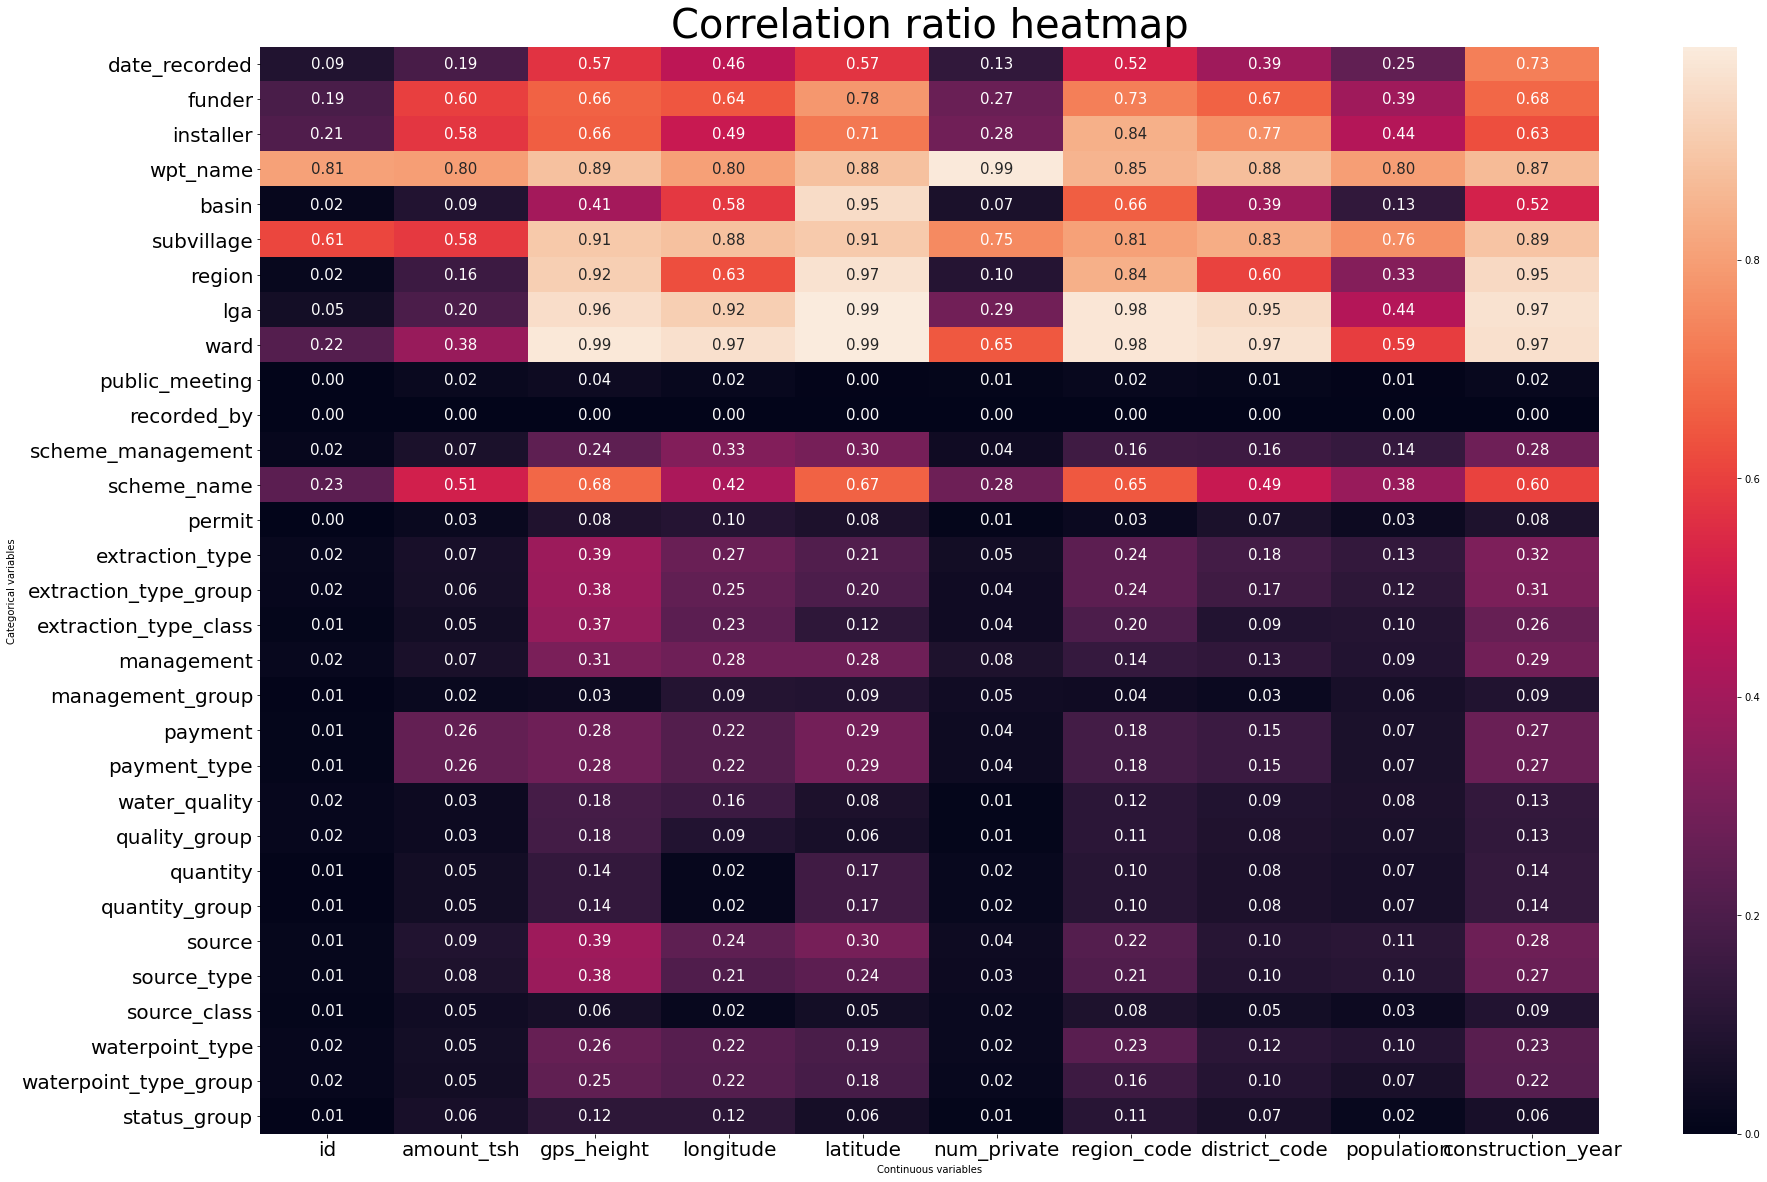

In [ ]:
# Plot heatmap
plt.figure(figsize=(30,20))
sns.heatmap(correlation_ratio_matrix, annot=True, fmt='.2f', annot_kws={'fontsize': 15})
plt.title("Correlation ratio heatmap", fontsize=40)
plt.xticks(fontsize=20)
plt.xlabel('Continuous variables')
plt.yticks(fontsize=20)
plt.ylabel('Categorical variables')

### Get correlated categorical variables based on correlation ratio

Here we will select categorical variables to drop based on high correlation ratio with numerical variables to avoid feature explosion in one-hot encoding

In [ ]:
# Initialize set to store the correlated categorical variables
columns_to_drop_in_seen_data_dict['Correlated variables based on correlation ratio'] = set()

# Set max allowed correlation ratio
max_allowed_correlation_ratio = 0.9

# Get list of categorical variables correlated to numerical variables
for i, categorical_column_name in enumerate(correlation_ratio_matrix.index.values):
    for j, continuous_column_name in enumerate(correlation_ratio_matrix.columns.values):
        if correlation_ratio_matrix.iloc[i, j] > max_allowed_correlation_ratio:
            print(f'{categorical_column_name} (categorical) is correlated to {continuous_column_name} (continuous).')
            print(f'    Adding {categorical_column_name} to drop columns set')
            columns_to_drop_in_seen_data_dict['Correlated variables based on correlation ratio'].add(categorical_column_name)

# Display the set
print('Categorical variables correlated to the numerical variables: ')
display(columns_to_drop_in_seen_data_dict['Correlated variables based on correlation ratio'])
print('--'*100)

# Drop the features in previously reduced version
reduced_seen_data_v8_df = reduced_seen_data_v7_df.drop(columns=columns_to_drop_in_seen_data_dict['Correlated variables based on correlation ratio'],
                                                       errors='ignore')  # Ignore if column not found in the dataframe

# Display current reduced seen data
print('Reduced data version 8:')
display(reduced_seen_data_v8_df)


wpt_name (categorical) is correlated to num_private (continuous).
    Adding wpt_name to drop columns set
basin (categorical) is correlated to latitude (continuous).
    Adding basin to drop columns set
subvillage (categorical) is correlated to gps_height (continuous).
    Adding subvillage to drop columns set
subvillage (categorical) is correlated to latitude (continuous).
    Adding subvillage to drop columns set
region (categorical) is correlated to gps_height (continuous).
    Adding region to drop columns set
region (categorical) is correlated to latitude (continuous).
    Adding region to drop columns set
region (categorical) is correlated to construction_year (continuous).
    Adding region to drop columns set
lga (categorical) is correlated to gps_height (continuous).
    Adding lga to drop columns set
lga (categorical) is correlated to longitude (continuous).
    Adding lga to drop columns set
lga (categorical) is correlated to latitude (continuous).
    Adding lga to drop col

{'basin', 'lga', 'region', 'subvillage', 'ward', 'wpt_name'}

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reduced data version 8:


amount_tsh                  funder  gps_height  ...  Year  Month  Date
0             7.0         Germany Republi        1203  ...  2013      3    20
1             0.0                    Cdtf        1409  ...  2011      2    21
2             0.0  Government Of Tanzania        1572  ...  2013      1     4
3             0.0        District Council           0  ...  2011      4     3
4           300.0        District Council        1283  ...  2013      3     8
...           ...                     ...         ...  ...   ...    ...   ...
44545         0.0            World Vision           0  ...  2013      1    23
44546         0.0                     Ded           0  ...  2011      7    25
44547         0.0  Government Of Tanzania         969  ...  2013      2    23
44548       200.0                    Adra        1269  ...  2013      3    26
44549         0.0            World Vision           0  ...  2013      1    26

[44550 rows x 18 columns]

### Reduced version after feature elimination so far

In [ ]:
reduced_seen_data_v8_df.select_dtypes('object')

funder            installer  ... permit    status_group
0             Germany Republi                  CES  ...   True      functional
1                        Cdtf                 CDTF  ...  False      functional
2      Government Of Tanzania                  DWE  ...   True  non functional
3            District Council     District Council  ...   True      functional
4            District Council     District Council  ...  False      functional
...                       ...                  ...  ...    ...             ...
44545            World Vision               TAWASA  ...   True      functional
44546                     Ded                  DED  ...   True  non functional
44547  Government Of Tanzania           Government  ...    NaN      functional
44548                    Adra      ADRA/Government  ...   True      functional
44549            World Vision  Consulting Engineer  ...  False      functional

[44550 rows x 6 columns]

In [ ]:
reduced_seen_data_v8_df.dtypes.value_counts()

int64      9
object     6
float64    3
dtype: int64

In [ ]:
reduced_seen_data_v8_df.select_dtypes('object').nunique()

funder               1651
installer            1854
public_meeting          2
scheme_management      12
permit                  2
status_group            3
dtype: int64

Note:
1. reduced_seen_data_v8_df is the dataframe we have after all the feature eliminations so far including feature elimination based on correlations.
2. We are left with 18 columns. Fortunately the categorical variables with very high number of unique values are dropped.

### Store it for getting selected features on unseen data

In [ ]:
reduced_seen_data_v8_df.to_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/reduced_seen_data_v8_df.pkl')

## Encoding on the reduced data after the feature eliminations

### Encoding of target

#### Function to encode target

In [ ]:
# define function for encoding multiple target columns
def encode_target_columns(data_df, y_column_names_list):
    # Initialize encoded dataframe which will be returned from this function
    encoded_data_df = data_df.copy(deep=True) # Modifications are independent

    for y_column_name in y_column_names_list:
        # Get target column
        y_data = data_df[y_column_name]
        display('Target column: ', y_data)
        print('--'*50)

        # Create instance (object) of target label encoder from the imported class 'LabelEncoder'
        y_label_encoder = LabelEncoder()

        # Fit the encoder instance
        fitted_y_label_encoder = y_label_encoder.fit(y_data)

        # Perform encoding
        encoded_y_data_array = fitted_y_label_encoder.transform(y_data)

        # Convert to data series
        encoded_y_data = pd.Series(encoded_y_data_array, name=y_column_name) # Name should be exactly same as in data for '.update' to work properly

         # Get number of classes in the target column
        target_classes = fitted_y_label_encoder.classes_
        print('Target classes: ', target_classes)
        print(f'Encoded as: ', fitted_y_label_encoder.transform(target_classes))
        print('--'*50)
        n_target_classes = len(target_classes)
        print('Number of target classes: ', n_target_classes)
        print('--'*50)

        # Store for unseen data
        save_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/fitted_y_label_encoder.joblib'
        dump(fitted_y_label_encoder, save_path)


        # Conver to numerical dataype
        encoded_y_data = encoded_y_data.astype('int64')
        display('Encoded target column: ', encoded_y_data)
        print('__'*50)
    
        # Update the target column in encoded data
        encoded_data_df.update(encoded_y_data)

    return encoded_data_df

# Note: variable names contains 'target_column' because LabelEncoder class is only to be used for target.


In [ ]:
# Define target columns list
target_column_names_list = ['status_group']

# Pass the imputed dataframe into encoding function
encoded_seen_data_v1_df = encode_target_columns(reduced_seen_data_v8_df, target_column_names_list)

# data type of target to numeric
encoded_seen_data_v1_df['status_group'] = encoded_seen_data_v1_df['status_group'].astype('int64')
print('Data type of target after chanding data type:')
display(encoded_seen_data_v1_df['status_group'].dtype)
print('--'*50)

## Display encoded data
display('Encoded data: ', encoded_seen_data_v1_df)
print('--'*50)


'Target column: '

0            functional
1            functional
2        non functional
3            functional
4            functional
              ...      
44545        functional
44546    non functional
44547        functional
44548        functional
44549        functional
Name: status_group, Length: 44550, dtype: object

----------------------------------------------------------------------------------------------------
Target classes:  ['functional' 'functional needs repair' 'non functional']
Encoded as:  [0 1 2]
----------------------------------------------------------------------------------------------------
Number of target classes:  3
----------------------------------------------------------------------------------------------------


'Encoded target column: '

0        0
1        0
2        2
3        0
4        0
        ..
44545    0
44546    2
44547    0
44548    0
44549    0
Name: status_group, Length: 44550, dtype: int64

____________________________________________________________________________________________________
Data type of target after chanding data type:


dtype('int64')

----------------------------------------------------------------------------------------------------


'Encoded data: '

amount_tsh                  funder  gps_height  ...  Year  Month  Date
0             7.0         Germany Republi        1203  ...  2013      3    20
1             0.0                    Cdtf        1409  ...  2011      2    21
2             0.0  Government Of Tanzania        1572  ...  2013      1     4
3             0.0        District Council           0  ...  2011      4     3
4           300.0        District Council        1283  ...  2013      3     8
...           ...                     ...         ...  ...   ...    ...   ...
44545         0.0            World Vision           0  ...  2013      1    23
44546         0.0                     Ded           0  ...  2011      7    25
44547         0.0  Government Of Tanzania         969  ...  2013      2    23
44548       200.0                    Adra        1269  ...  2013      3    26
44549         0.0            World Vision           0  ...  2013      1    26

[44550 rows x 18 columns]

----------------------------------------------------------------------------------------------------


### One-hot encoding of input variables

In [ ]:
# Encode using pandas '.get_dummies'
encoded_seen_data_v2_df = pd.get_dummies(encoded_seen_data_v1_df)

# Display
display(encoded_seen_data_v2_df)

amount_tsh  gps_height  ...  permit_False  permit_True
0             7.0        1203  ...             0            1
1             0.0        1409  ...             1            0
2             0.0        1572  ...             0            1
3             0.0           0  ...             0            1
4           300.0        1283  ...             1            0
...           ...         ...  ...           ...          ...
44545         0.0           0  ...             0            1
44546         0.0           0  ...             0            1
44547         0.0         969  ...             0            0
44548       200.0        1269  ...             0            1
44549         0.0           0  ...             1            0

[44550 rows x 3534 columns]

# Exploratory data analysis

## Numerical descriptive statistics

In [ ]:
as_read_seen_data_df.describe()

id     amount_tsh  ...    population  construction_year
count  44550.000000   44550.000000  ...  44550.000000       44550.000000
mean   37192.623681     307.623224  ...    179.112750        1295.782155
std    21399.827198    2402.742799  ...    478.995645         953.183961
min        1.000000       0.000000  ...      0.000000           0.000000
25%    18723.250000       0.000000  ...      0.000000           0.000000
50%    37183.500000       0.000000  ...     25.000000        1985.000000
75%    55647.500000      20.000000  ...    210.000000        2004.000000
max    74247.000000  170000.000000  ...  30500.000000        2013.000000

[8 rows x 10 columns]

## Target distribution

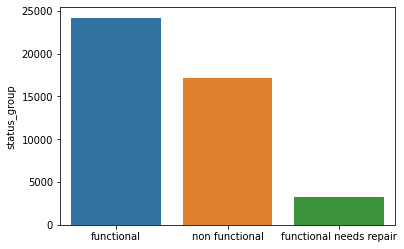

In [ ]:
# Get target classes
target_classes = as_read_seen_data_df['status_group'].unique()

# Get counts of target classes
target_class_counts = as_read_seen_data_df['status_group'].value_counts()

# Plot 
sns.barplot(x=target_classes, y=target_class_counts)

Observations:
1. Its a imbalanced multi-class classification problem.

Useful resource:
1. https://stats.stackexchange.com/questions/250273/benefits-of-stratified-vs-random-sampling-for-generating-training-data-in-classi/250742#250742

#### Kde plots of target distributions with numerical columns

In [ ]:
def plot_target_distributions(data_df, target_column, color_mapping_dict):
    # Drop get numerical columns in the input data to iterate over and get number of rows in subplots
    numeric_data_df = data_df.select_dtypes(include=['int64', 'float64'])

    # Get number of rows to set in subplots
    n_subplots_rows = len(numeric_data_df.columns)

    # Create a figure and a set of subplots
    figure, axes_array = plt.subplots(nrows=n_subplots_rows, ncols=1, figsize=(10*1, 5*n_subplots_rows))

    # Iterate through the float columns
    for i, column_name in enumerate(numeric_data_df.columns): 
        for target_value, color in color_mapping_dict.items(): # Iterate through colours_dict
            # Get boolean list indicating whether target value is present or not
            target_boolean_list = data_df[target_column]==target_value

            # Get the values in current column corresponding to the target value
            column_data_corresponding_to_target_value = data_df.loc[target_boolean_list, column_name]

            # Plot each quality level as a separate line
            kde_plot = sns.kdeplot(ax=axes_array[i], x=column_data_corresponding_to_target_value, color = color, label=target_value)
        
        # Plot title and labels
        axes_array[i].set_title(f'{column_name} Distribution') 
        axes_array[i].set_xlabel(f'{column_name}')
        axes_array[i].set_ylabel('Density')
        axes_array[i].legend() # Show legend for subplot

    figure.tight_layout()  # Adjust the padding between and around subplots.

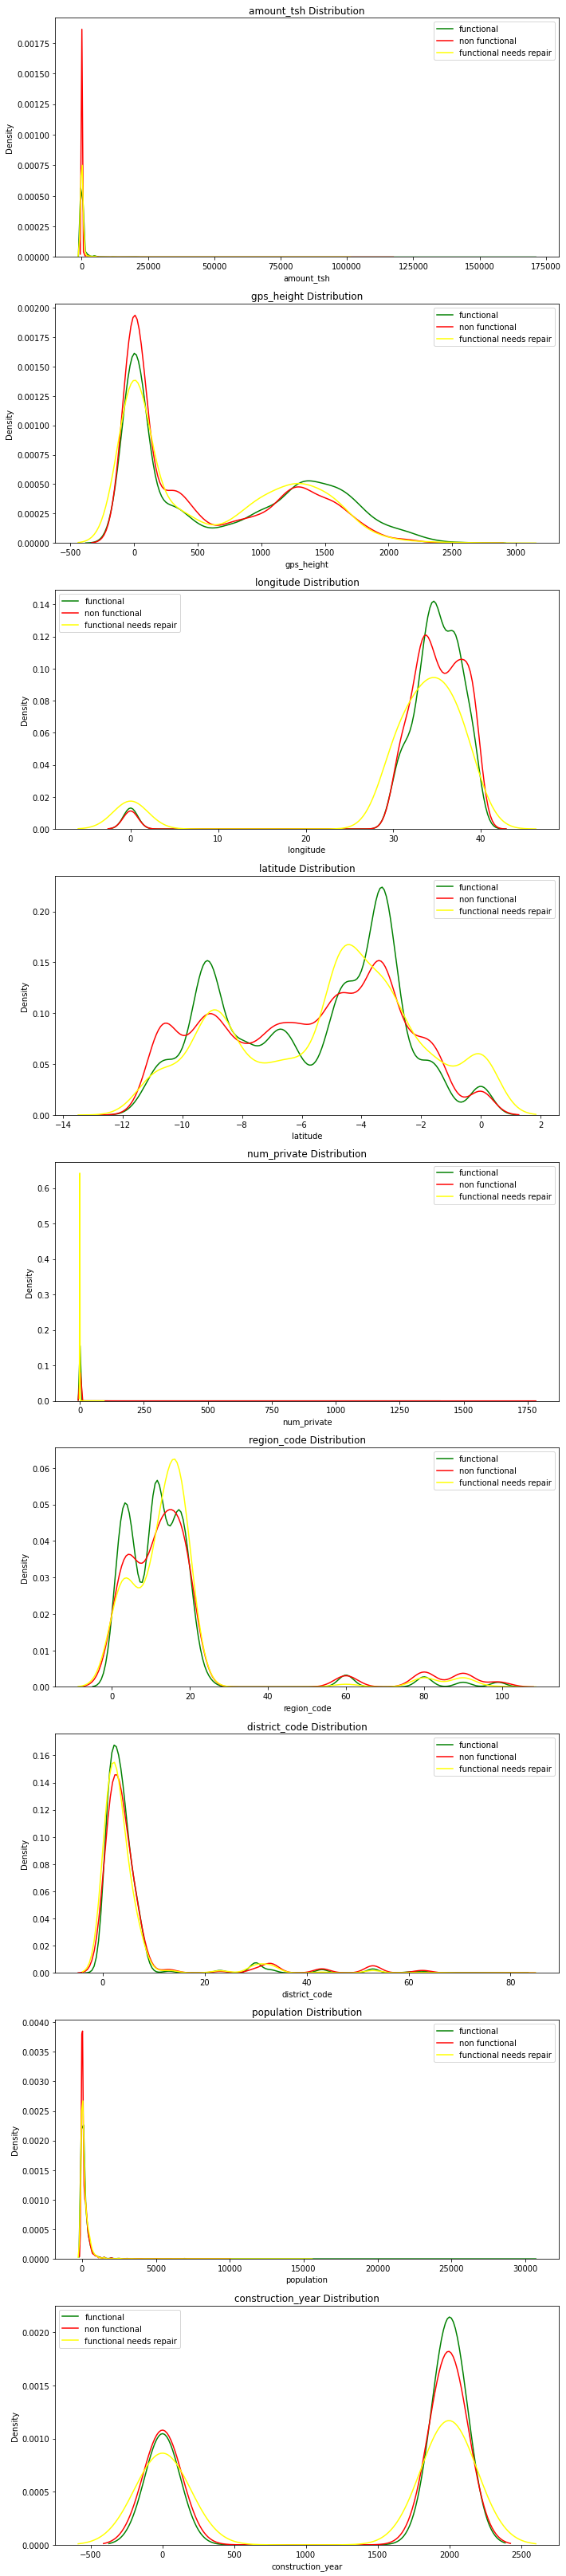

In [ ]:
# Define color mapping to target values
color_mapping_dict = {
    'functional': 'green', 
    'non functional': 'red',
    'functional needs repair': 'yellow'
    }


# Call the target distributions plotting function on imputed data
plot_target_distributions(data_df=as_read_seen_data_df.drop(columns='id', inplace=False), 
                          target_column='status_group', color_mapping_dict=color_mapping_dict)

Observations:
1. 'amount_tst', 'num_private' and 'population' do not seem to be indicative of target classes.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

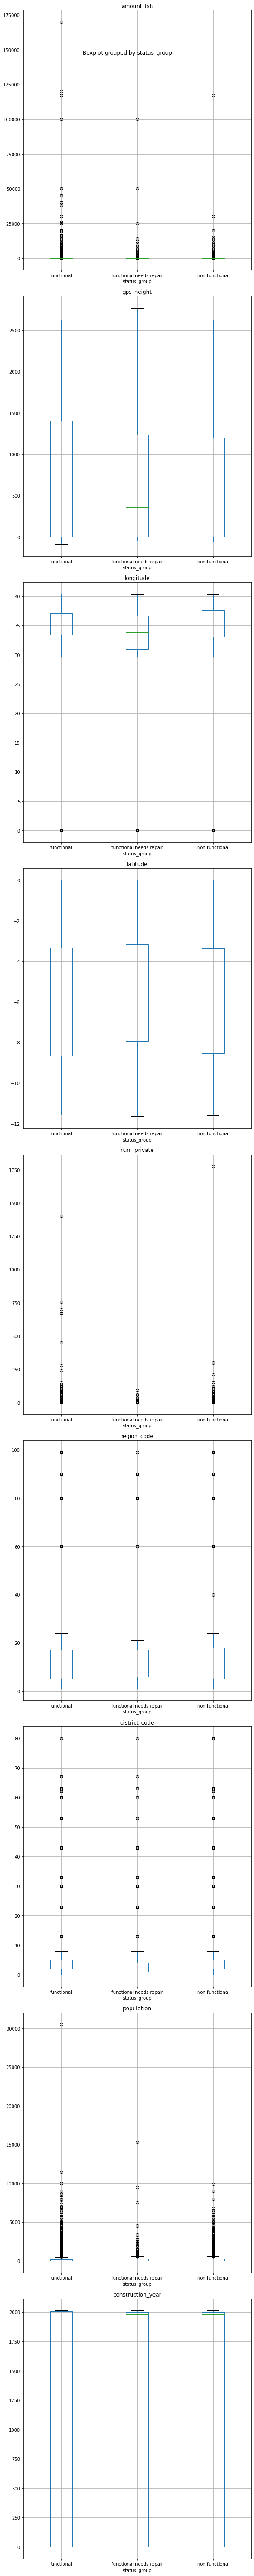

In [ ]:
df_to_plot = numerical_as_read_seen_data_df.assign(status_group=as_read_seen_data_df['status_group'])

# Plot boxplots for both classes corresponding to each column
figure, axes_array = plt.subplots(nrows=len(df_to_plot.columns.values[1:-1]), ncols=1, figsize=(8,80))
for i, column_name in enumerate(df_to_plot.columns.values[1:-1]): # Skip target column (last
    df_to_plot.boxplot(ax=axes_array[i], by='status_group', column=column_name, grid=True)
plt.tight_layout() # Avoids overlapping of x-labels and plot tittles

In [ ]:
# Lets check number of unique values once
numerical_as_read_seen_data_df.nunique()

id                   44550
amount_tsh              85
gps_height            2396
longitude            43155
latitude             43155
num_private             59
region_code             27
district_code           20
population             956
construction_year       55
dtype: int64

## Histograms of numerical variables

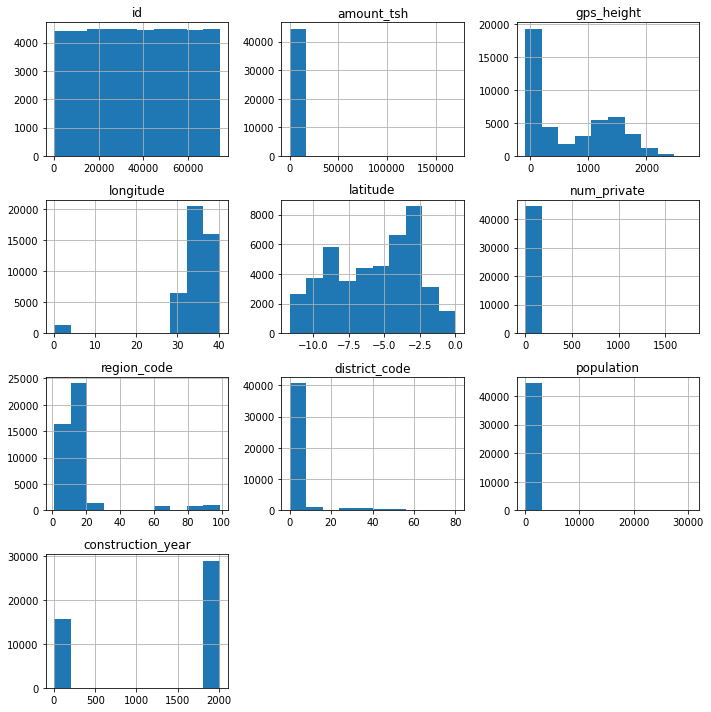

In [ ]:
numerical_as_read_seen_data_df.hist(figsize=(10,10))
plt.tight_layout()

Observations:
1. Highly skewed variables could be dropped however we will not drop it here.

In [ ]:
reduced_seen_data_v8_df

amount_tsh                  funder  gps_height  ...  Year  Month  Date
0             7.0         Germany Republi        1203  ...  2013      3    20
1             0.0                    Cdtf        1409  ...  2011      2    21
2             0.0  Government Of Tanzania        1572  ...  2013      1     4
3             0.0        District Council           0  ...  2011      4     3
4           300.0        District Council        1283  ...  2013      3     8
...           ...                     ...         ...  ...   ...    ...   ...
44545         0.0            World Vision           0  ...  2013      1    23
44546         0.0                     Ded           0  ...  2011      7    25
44547         0.0  Government Of Tanzania         969  ...  2013      2    23
44548       200.0                    Adra        1269  ...  2013      3    26
44549         0.0            World Vision           0  ...  2013      1    26

[44550 rows x 18 columns]

# ML modelling

Saving and loading models - https://scikit-learn.org/stable/modules/model_persistence.html

## Data preprocessing for ML modelling

### Separate X and y data

In [ ]:
# Display current version of encoded
display(encoded_seen_data_v2_df)
print('--'*100)

# Data types
encoded_seen_data_v2_df.dtypes.value_counts()

amount_tsh  gps_height  ...  permit_False  permit_True
0             7.0        1203  ...             0            1
1             0.0        1409  ...             1            0
2             0.0        1572  ...             0            1
3             0.0           0  ...             0            1
4           300.0        1283  ...             1            0
...           ...         ...  ...           ...          ...
44545         0.0           0  ...             0            1
44546         0.0           0  ...             0            1
44547         0.0         969  ...             0            0
44548       200.0        1269  ...             0            1
44549         0.0           0  ...             1            0

[44550 rows x 3534 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


uint8      3521
int64        10
float64       3
dtype: int64

In [ ]:
# Get input data
encoded_X_data_df = encoded_seen_data_v2_df.drop(columns='status_group', inplace=False)

# Display encoded input data
print('Encoded input data:')
display(encoded_X_data_df)
print('--'*50)

# Get target data
encoded_y_data_series = encoded_seen_data_v2_df['status_group']

# Display
print('Encoded target:')
display(encoded_y_data_series)

Encoded input data:


amount_tsh  gps_height  ...  permit_False  permit_True
0             7.0        1203  ...             0            1
1             0.0        1409  ...             1            0
2             0.0        1572  ...             0            1
3             0.0           0  ...             0            1
4           300.0        1283  ...             1            0
...           ...         ...  ...           ...          ...
44545         0.0           0  ...             0            1
44546         0.0           0  ...             0            1
44547         0.0         969  ...             0            0
44548       200.0        1269  ...             0            1
44549         0.0           0  ...             1            0

[44550 rows x 3533 columns]

----------------------------------------------------------------------------------------------------
Encoded target:


0        0
1        0
2        2
3        0
4        0
        ..
44545    0
44546    2
44547    0
44548    0
44549    0
Name: status_group, Length: 44550, dtype: int64

In [ ]:
pprint(columns_to_drop_in_seen_data_dict)

OrderedDict([('Similar features',
              ['extraction_type',
               'extraction_type_group',
               'management',
               'payment',
               'water_quality',
               'quantity',
               'source',
               'source_type',
               'waterpoint_type']),
             ('IDs', ['id']),
             ('Only 1 unique value', ['recorded_by']),
             ('Modified date_recorded',
                     Year  Month  Date
0      2013      3    20
1      2011      2    21
2      2013      1     4
3      2011      4     3
4      2013      3     8
...     ...    ...   ...
44545  2013      1    23
44546  2011      7    25
44547  2013      2    23
44548  2013      3    26
44549  2013      1    26

[44550 rows x 3 columns]),
             ('Features with high % missing values', ['scheme_name']),
             ('Correlated variables based on cramers V',
              {'extraction_type_class',
               'extraction_type_group',
            

### Train test data split

In [ ]:
# Set test size
test_size = 0.15

#  Split data into train and test
encoded_X_train_df, encoded_X_test_df, encoded_y_train_series, encoded_y_test_series = train_test_split(encoded_X_data_df, encoded_y_data_series, test_size=test_size, random_state=7)

# Confirmation of train test splits using shapes
display('data shape: ', encoded_X_data_df.shape)
display('Input train data shape: ', encoded_X_train_df.shape)  # 85 % of the data
display('Target train data shape: ', encoded_y_train_series.shape)  # 85 % of the data
display('Input test data shape: ', encoded_X_test_df.shape)  # 15 % of the data
display('Target test data shape: ', encoded_y_test_series.shape)  # 15 % of the data
print('--'*50)

# Display input train data
print('Encoded input train data:')
display(encoded_X_train_df) # Note that column names are retained during scaling
print('--'*50)

# Display encoded target data
print('Encoded target train data:')
display(encoded_y_train_series)
print('--'*50)

# Display encoded test data
print('Encoded input test data:')
display(encoded_X_test_df)
print('--'*50)

# Display encoded target test data
print('Encoded input test data:')
display(encoded_y_test_series)

'data shape: '

(44550, 3533)

'Input train data shape: '

(37867, 3533)

'Target train data shape: '

(37867,)

'Input test data shape: '

(6683, 3533)

'Target test data shape: '

(6683,)

----------------------------------------------------------------------------------------------------
Encoded input train data:


amount_tsh  gps_height  ...  permit_False  permit_True
15820         0.0        1747  ...             1            0
17753         0.0        1266  ...             1            0
28830        50.0         156  ...             0            1
6792          6.0        1115  ...             0            1
34677         0.0           0  ...             0            1
...           ...         ...  ...           ...          ...
34140         0.0        1198  ...             0            1
13927        20.0         197  ...             1            0
919           6.0         809  ...             0            1
38467         0.0        1378  ...             0            1
10742         0.0           0  ...             0            1

[37867 rows x 3533 columns]

----------------------------------------------------------------------------------------------------
Encoded target train data:


15820    2
17753    2
28830    2
6792     0
34677    2
        ..
34140    2
13927    0
919      0
38467    0
10742    0
Name: status_group, Length: 37867, dtype: int64

----------------------------------------------------------------------------------------------------
Encoded input test data:


amount_tsh  gps_height  ...  permit_False  permit_True
28273         0.0        1560  ...             0            1
3750       1000.0        1558  ...             1            0
41649       500.0         264  ...             0            1
38038         0.0        1323  ...             0            1
9719          0.0        1856  ...             0            1
...           ...         ...  ...           ...          ...
2798         10.0        1444  ...             0            1
36407         0.0           0  ...             1            0
34126         0.0        1454  ...             0            1
39338       100.0        1096  ...             0            1
43418       100.0        2156  ...             1            0

[6683 rows x 3533 columns]

----------------------------------------------------------------------------------------------------
Encoded input test data:


28273    2
3750     0
41649    0
38038    1
9719     0
        ..
2798     0
36407    0
34126    0
39338    0
43418    2
Name: status_group, Length: 6683, dtype: int64

### Feature selection from model

#### Using XGBoost

In [ ]:
def XGB_column_names_cleaner(X_data_df):
    """
    - Tejas Chaudhari
    """

    # Initiate dataframe
    XGBC_X_data_df = X_data_df.copy(deep=True)

    # Script to remove '[', ']', and '<' from column names
    for i, column_name in enumerate(X_data_df.columns):
        if '[' in column_name or ']' in column_name or '<' in column_name:
            print('Column name to change: ', column_name)
            new_column_name = column_name.replace(']', '_').replace('[', '_')
            XGBC_X_data_df.rename(columns={column_name: new_column_name}, inplace=True)
            print('Changed to: ', XGBC_X_data_df.columns[i])
    
    return XGBC_X_data_df

In [ ]:
# Adjust column names of train data
print('Adjusting column names of train data:')
XGBRFC_X_train_df = XGB_column_names_cleaner(encoded_X_train_df)
print('--'*50)

# Display
print('Feature names adjusted input train data:')
display(XGBRFC_X_train_df)
print('--'*50)

# Adjust column names of test data
print('Adjusting column names of test data:')
XGBRFC_X_test_df = XGB_column_names_cleaner(encoded_X_test_df)

# Display
print('Feature names adjusted input test data:')
display(XGBRFC_X_test_df)
print('--'*50)

Adjusting column names of train data:
Column name to change:  funder_Apm[africa Precious Metals Lt
Changed to:  funder_Apm_africa Precious Metals Lt
Column name to change:  funder_Jeshi La Wokovu [cida]
Changed to:  funder_Jeshi La Wokovu _cida_
Column name to change:  funder_Nimrodi Mkono[mb]
Changed to:  funder_Nimrodi Mkono_mb_
Column name to change:  installer_Jeshi la wokovu [cida]
Changed to:  installer_Jeshi la wokovu _cida_
Column name to change:  installer_Nimrod Mkono[mb]
Changed to:  installer_Nimrod Mkono_mb_
----------------------------------------------------------------------------------------------------
Feature names adjusted input train data:


amount_tsh  gps_height  ...  permit_False  permit_True
15820         0.0        1747  ...             1            0
17753         0.0        1266  ...             1            0
28830        50.0         156  ...             0            1
6792          6.0        1115  ...             0            1
34677         0.0           0  ...             0            1
...           ...         ...  ...           ...          ...
34140         0.0        1198  ...             0            1
13927        20.0         197  ...             1            0
919           6.0         809  ...             0            1
38467         0.0        1378  ...             0            1
10742         0.0           0  ...             0            1

[37867 rows x 3533 columns]

----------------------------------------------------------------------------------------------------
Adjusting column names of test data:
Column name to change:  funder_Apm[africa Precious Metals Lt
Changed to:  funder_Apm_africa Precious Metals Lt
Column name to change:  funder_Jeshi La Wokovu [cida]
Changed to:  funder_Jeshi La Wokovu _cida_
Column name to change:  funder_Nimrodi Mkono[mb]
Changed to:  funder_Nimrodi Mkono_mb_
Column name to change:  installer_Jeshi la wokovu [cida]
Changed to:  installer_Jeshi la wokovu _cida_
Column name to change:  installer_Nimrod Mkono[mb]
Changed to:  installer_Nimrod Mkono_mb_
Feature names adjusted input test data:


amount_tsh  gps_height  ...  permit_False  permit_True
28273         0.0        1560  ...             0            1
3750       1000.0        1558  ...             1            0
41649       500.0         264  ...             0            1
38038         0.0        1323  ...             0            1
9719          0.0        1856  ...             0            1
...           ...         ...  ...           ...          ...
2798         10.0        1444  ...             0            1
36407         0.0           0  ...             1            0
34126         0.0        1454  ...             0            1
39338       100.0        1096  ...             0            1
43418       100.0        2156  ...             1            0

[6683 rows x 3533 columns]

----------------------------------------------------------------------------------------------------


In [ ]:
# Create feature selector model instance
XGBRFC_feature_selector_model = SelectFromModel(estimator=XGBRFClassifier())

# Record start time
start_time = time.time()

# Fit the feature selector model
fitted_XGBRFC_feature_selector_model = XGBRFC_feature_selector_model.fit(XGBRFC_X_train_df, encoded_y_train_series)

# Display time elapsed
print(f'Time elapsed in fitting XGBRFC feature selector: {(time.time() - start_time)/60:.3f} minutes.')

# Save model
save_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_XGBRFC_feature_selector_model.joblib'
dump(fitted_XGBRFC_feature_selector_model, save_path)

Time elapsed in fitting XGBRFC feature selector: 10.439 minutes.


['/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_XGBRFC_feature_selector_model.joblib']

In [ ]:
# Get reduced input train data using XGBRFC feature selector
reduced_XGBRFC_X_train_array = fitted_XGBRFC_feature_selector_model.transform(XGBRFC_X_train_df)

# Get boolean list of selected features
selected_features_boolean_list =fitted_XGBRFC_feature_selector_model.get_support() 

# Convert reduced input train data array to dataframe
reduced_XGBRFC_X_train_df = pd.DataFrame(reduced_XGBRFC_X_train_array, columns=XGBRFC_X_train_df.columns[selected_features_boolean_list], index=XGBRFC_X_train_df.index)

# Display
print('Reduced input train data using XGBRFC feature selector:')
display(reduced_XGBRFC_X_train_df)
print('--'*100)

# Get reduced input test data using XGBRFC feature selector
reduced_XGBRFC_X_test_array = fitted_XGBRFC_feature_selector_model.transform(XGBRFC_X_test_df)

# Convert reduced input test data array to dataframe
reduced_XGBRFC_X_test_df = pd.DataFrame(reduced_XGBRFC_X_test_array, columns=XGBRFC_X_test_df.columns[selected_features_boolean_list], index=XGBRFC_X_test_df.index)

# Display
print('Reduced input test data using XGBRFC feature selector:')
display(reduced_XGBRFC_X_test_df)
print('--'*100)

Reduced input train data using XGBRFC feature selector:


amount_tsh  gps_height  ...  scheme_management_Water authority  permit_False
15820         0.0      1747.0  ...                                0.0           1.0
17753         0.0      1266.0  ...                                0.0           1.0
28830        50.0       156.0  ...                                0.0           0.0
6792          6.0      1115.0  ...                                0.0           0.0
34677         0.0         0.0  ...                                0.0           0.0
...           ...         ...  ...                                ...           ...
34140         0.0      1198.0  ...                                0.0           0.0
13927        20.0       197.0  ...                                0.0           1.0
919           6.0       809.0  ...                                0.0           0.0
38467         0.0      1378.0  ...                                0.0           0.0
10742         0.0         0.0  ...                                0.0           0.0

[37867 rows x 39 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reduced input test data using XGBRFC feature selector:


amount_tsh  gps_height  ...  scheme_management_Water authority  permit_False
28273         0.0      1560.0  ...                                0.0           0.0
3750       1000.0      1558.0  ...                                0.0           1.0
41649       500.0       264.0  ...                                0.0           0.0
38038         0.0      1323.0  ...                                0.0           0.0
9719          0.0      1856.0  ...                                0.0           0.0
...           ...         ...  ...                                ...           ...
2798         10.0      1444.0  ...                                0.0           0.0
36407         0.0         0.0  ...                                0.0           1.0
34126         0.0      1454.0  ...                                0.0           0.0
39338       100.0      1096.0  ...                                0.0           0.0
43418       100.0      2156.0  ...                                0.0           1.0

[6683 rows x 39 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Observations:
1. only 37 features are selected by feature selection using XGBRFC

### Scale numerical input data

Note:
1. We only standardize numerical data and not the encoded categorical data.

In [ ]:
def scale_selected_columns(encoded_X_train_df, encoded_X_test_df, selected_column_names_list):
    """
    - Tejas Chaudhari.
    """

    # Get list of selected columns names which are present in the input train data
    present_selected_column_names_list = [] # Initiate list to store the column names
    for column_name in selected_column_names_list:
        if column_name in encoded_X_train_df.columns:
            present_selected_column_names_list.append(column_name)

    # Display
    print('Following columns would be scaled in the input train and test data:')
    print(present_selected_column_names_list)
    print('--'*50)

    # Get numerical input train data
    numerical_X_train_df = encoded_X_train_df[present_selected_column_names_list]

    # display
    print('Selected numerical input train data:')
    display(numerical_X_train_df)
    print('--'*100)

    # Display data types of numerical input data
    print('Data types in numerical input train data:')
    display(numerical_X_train_df.dtypes.value_counts())
    print('--'*50)

    # Get numerical input train data
    numerical_X_test_df = encoded_X_test_df[present_selected_column_names_list]

    # display
    print('Selected numerical input test data:')
    display(numerical_X_test_df)
    print('--'*100)

    # Display data types of numerical input data
    print('Data types in numerical input test data:')
    display(numerical_X_test_df.dtypes.value_counts())
    print('--'*50)

    # Scale the numerical input train data

    # Create standard scaler instance from the imported class
    standard_scaler_model = StandardScaler()

    # Fit the standardizer on train
    fitted_standard_scaler_model = standard_scaler_model.fit(numerical_X_train_df)

    # Scale the input training data
    scaled_numerical_X_train_array = fitted_standard_scaler_model.transform(numerical_X_train_df)

    # Convert to dataframe
    scaled_numerical_X_train_df = pd.DataFrame(scaled_numerical_X_train_array, columns=numerical_X_train_df.columns, index=numerical_X_train_df.index)

    # Display
    print('Scaled numerical X train:')
    display(scaled_numerical_X_train_df)
    print('--'*100)


    # Confirmation
    display(scaled_numerical_X_train_df.agg(['mean', 'std']))
    print('--'*100)

    # Confirmation
    display(scaled_numerical_X_train_df.agg(['mean', 'std']).mean(axis=1))

    # Scale numerical test data

    # Standardize test data
    scaled_numerical_X_test_array = fitted_standard_scaler_model.transform(numerical_X_test_df)

    # Conver to dataframe
    scaled_numerical_X_test_df = pd.DataFrame(scaled_numerical_X_test_array, columns=numerical_X_test_df.columns,
                                            index=numerical_X_test_df.index)

    # Display
    print('Scaled numerical X test:')
    display(scaled_numerical_X_test_df)
    print('--'*100)

    # Confirm
    display(scaled_numerical_X_test_df.agg(['mean', 'std']))
    print('--'*100)

    # Confirmation
    display(scaled_numerical_X_test_df.agg(['mean', 'std']).mean(axis=1))


    # Update numerical columns in input train and test data with the standardized columns

    # Merge encoded categorical and standardized numerical train data
    scaled_encoded_X_train_df = encoded_X_train_df.copy(deep=True) # Modifications are independent
    scaled_encoded_X_train_df.update(scaled_numerical_X_train_df)

    # Display
    print('Scaled input encoded X train data:')
    display(scaled_encoded_X_train_df)
    print('--'*100)

    # Confirmation
    display(scaled_encoded_X_train_df.agg(['mean', 'std']))
    print('--'*100)

    # Merge encoded categorical and standardized numerical test data
    scaled_encoded_X_test_df = encoded_X_test_df.copy(deep=True) # Modifications are independent
    scaled_encoded_X_test_df.update(scaled_numerical_X_test_df)

    # Input test data
    print('Scaled input encoded X test data:')
    display(scaled_encoded_X_test_df)
    print('--'*100)

    # Confirmation
    display(scaled_encoded_X_test_df.agg(['mean', 'std']))
    print('--'*100)

    return scaled_encoded_X_train_df, scaled_encoded_X_test_df

In [ ]:
# Get get the numerical columns list
numerical_column_names_in_X_list = [] # Initialize
for column_name in numerical_as_read_seen_data_df.columns:
    if column_name in encoded_X_data_df.columns:
        numerical_column_names_in_X_list.append(column_name)

selected_columns_list = numerical_column_names_in_X_list

scaled_encoded_reduced_XGBRFC_X_train_df, scaled_encoded_reduced_XGBRFC_X_test_df = scale_selected_columns(reduced_XGBRFC_X_train_df, 
                                                                                                           reduced_XGBRFC_X_test_df, 
                                                                                                           selected_columns_list)

Following columns would be scaled in the input train and test data:
['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year']
----------------------------------------------------------------------------------------------------
Selected numerical input train data:


amount_tsh  gps_height  ...  population  construction_year
15820         0.0      1747.0  ...        70.0             2006.0
17753         0.0      1266.0  ...       180.0             1994.0
28830        50.0       156.0  ...        25.0             2007.0
6792          6.0      1115.0  ...        45.0             2008.0
34677         0.0         0.0  ...         0.0                0.0
...           ...         ...  ...         ...                ...
34140         0.0      1198.0  ...         1.0             1995.0
13927        20.0       197.0  ...       400.0             1983.0
919           6.0       809.0  ...        15.0             2008.0
38467         0.0      1378.0  ...         1.0             2009.0
10742         0.0         0.0  ...        50.0             2007.0

[37867 rows x 8 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Data types in numerical input train data:


float64    8
dtype: int64

----------------------------------------------------------------------------------------------------
Selected numerical input test data:


amount_tsh  gps_height  ...  population  construction_year
28273         0.0      1560.0  ...         1.0             2001.0
3750       1000.0      1558.0  ...        50.0             2008.0
41649       500.0       264.0  ...        80.0             2005.0
38038         0.0      1323.0  ...       545.0             2008.0
9719          0.0      1856.0  ...         0.0                0.0
...           ...         ...  ...         ...                ...
2798         10.0      1444.0  ...        35.0             1999.0
36407         0.0         0.0  ...         0.0                0.0
34126         0.0      1454.0  ...         1.0             2011.0
39338       100.0      1096.0  ...      6000.0             2009.0
43418       100.0      2156.0  ...         0.0             1989.0

[6683 rows x 8 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Data types in numerical input test data:


float64    8
dtype: int64

----------------------------------------------------------------------------------------------------
Scaled numerical X train:


amount_tsh  gps_height  ...  population  construction_year
15820   -0.129616    1.561514  ...   -0.225054           0.745192
17753   -0.129616    0.867633  ...    0.000472           0.732603
28830   -0.108735   -0.733631  ...   -0.317315           0.746241
6792    -0.127111    0.649804  ...   -0.276310           0.747290
34677   -0.129616   -0.958673  ...   -0.368571          -1.359336
...           ...         ...  ...         ...                ...
34140   -0.129616    0.769538  ...   -0.366520           0.733652
13927   -0.121264   -0.674485  ...    0.451525           0.721062
919     -0.127111    0.208374  ...   -0.337817           0.747290
38467   -0.129616    1.029202  ...   -0.366520           0.748339
10742   -0.129616   -0.958673  ...   -0.266059           0.746241

[37867 rows x 8 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


amount_tsh    gps_height  ...    population  construction_year
mean  2.534438e-16 -2.310338e-16  ...  1.747545e-16       1.089439e-15
std   1.000013e+00  1.000013e+00  ...  1.000013e+00       1.000013e+00

[2 rows x 8 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


mean    7.251242e-17
std     1.000013e+00
dtype: float64

Scaled numerical X test:


amount_tsh  gps_height  ...  population  construction_year
28273   -0.129616    1.291752  ...   -0.366520           0.739946
3750     0.288017    1.288867  ...   -0.266059           0.747290
41649    0.079200   -0.577832  ...   -0.204552           0.744143
38038   -0.129616    0.949860  ...    0.748809           0.747290
9719    -0.129616    1.718756  ...   -0.368571          -1.359336
...           ...         ...  ...         ...                ...
2798    -0.125440    1.124413  ...   -0.296812           0.737848
36407   -0.129616   -0.958673  ...   -0.368571          -1.359336
34126   -0.129616    1.138838  ...   -0.366520           0.750438
39338   -0.087853    0.622395  ...   11.932860           0.748339
43418   -0.087853    2.151530  ...   -0.368571           0.727357

[6683 rows x 8 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


amount_tsh  gps_height  ...  population  construction_year
mean   -0.007617    0.009002  ...   -0.008978           0.000604
std     1.022860    1.004294  ...    0.873386           1.000007

[2 rows x 8 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


mean   -0.000572
std     0.987049
dtype: float64

Scaled input encoded X train data:


amount_tsh  gps_height  ...  scheme_management_Water authority  permit_False
15820   -0.129616    1.561514  ...                                0.0           1.0
17753   -0.129616    0.867633  ...                                0.0           1.0
28830   -0.108735   -0.733631  ...                                0.0           0.0
6792    -0.127111    0.649804  ...                                0.0           0.0
34677   -0.129616   -0.958673  ...                                0.0           0.0
...           ...         ...  ...                                ...           ...
34140   -0.129616    0.769538  ...                                0.0           0.0
13927   -0.121264   -0.674485  ...                                0.0           1.0
919     -0.127111    0.208374  ...                                0.0           0.0
38467   -0.129616    1.029202  ...                                0.0           0.0
10742   -0.129616   -0.958673  ...                                0.0           0.0

[37867 rows x 39 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


amount_tsh  ...  permit_False
mean  2.534438e-16  ...      0.294557
std   1.000013e+00  ...      0.455850

[2 rows x 39 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scaled input encoded X test data:


amount_tsh  gps_height  ...  scheme_management_Water authority  permit_False
28273   -0.129616    1.291752  ...                                0.0           0.0
3750     0.288017    1.288867  ...                                0.0           1.0
41649    0.079200   -0.577832  ...                                0.0           0.0
38038   -0.129616    0.949860  ...                                0.0           0.0
9719    -0.129616    1.718756  ...                                0.0           0.0
...           ...         ...  ...                                ...           ...
2798    -0.125440    1.124413  ...                                0.0           0.0
36407   -0.129616   -0.958673  ...                                0.0           1.0
34126   -0.129616    1.138838  ...                                0.0           0.0
39338   -0.087853    0.622395  ...                                0.0           0.0
43418   -0.087853    2.151530  ...                                0.0           1.0

[6683 rows x 39 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


amount_tsh  gps_height  ...  scheme_management_Water authority  permit_False
mean   -0.007617    0.009002  ...                           0.051923      0.299716
std     1.022860    1.004294  ...                           0.221888      0.458168

[2 rows x 39 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## My strategy

1. Its a imbalanced multi-class classificaton problem.
2. As the amount of data is large feature eliminations based on symmetric categorical to categorical correlation (Cramer's V), assymetric categorical to categorical correlation (Theil's U) and categorical to numerical correlation (Correlation ratio) were performed.
3. Still this feature elimination one hot bit encoding of the nominal categorical variables results in about 3500 features which is pretty large.
4. I think bagging will be required in order to save computational time on this data.
5. Also based on Kaggle competitions emsembles methods (averaging or boosting) has been observed to give better performance metrics. So we will try them too.
6. I think normal squential boosting won't be a perfect fit unless we perform dimension reduction. So we will go with averaging method:bagging
7. As the amount of data is large XGBOOST would be a legit choice too.


Useful resources:
1. https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
2. https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
3. https://www.youtube.com/watch?v=38SUUaMX5Rg


The goal of **ensemble methods** is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

In **averaging methods**, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

Examples: Bagging methods, Forests of randomized trees, …

By contrast, in **boosting methods**, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).

Source - https://scikit-learn.org/stable/modules/ensemble.html

## Testing models

Approach: GridSearchCV will be followed by RandomSearchCV, as the data size is large and RandomSerachCV is faster.

Useful resource:
1. https://towardsdatascience.com/gridsearchcv-or-randomsearchcv-5aa4acf5348c

### Store final train test data 

In [ ]:
X_train = reduced_XGBRFC_X_train_df
scaled_X_train = scaled_encoded_reduced_XGBRFC_X_train_df
y_train = encoded_y_train_series
X_test = reduced_XGBRFC_X_test_df
scaled_X_test = scaled_encoded_reduced_XGBRFC_X_test_df
y_test = encoded_y_test_series

In [ ]:
X_train.to_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/X_train.pkl')
scaled_X_train.to_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/scaled_X_train.pkl')
y_train.to_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/y_train.pkl')
X_test.to_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/X_test.pkl')
scaled_X_test.to_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/scaled_X_test.pkl')
y_test.to_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/y_test.pkl')

In [ ]:
X_train = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/X_train.pkl')
scaled_X_train = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/scaled_X_train.pkl')
y_train = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/y_train.pkl')
X_test = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/X_test.pkl')
scaled_X_test = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/scaled_X_test.pkl')
y_test = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/y_test.pkl')

### SVC

Useful resource:
1. Bagging with GridSearchCV - 

https://stackoverflow.com/questions/47570307/tuning-parameters-of-the-classifier-used-by-baggingclassifier

https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/ensemble/tests/test_bagging.py

In [ ]:
SVC_hyperparams_dict = {
    'base_estimator__C': [0.01, 0.1, 1, 10],
    'base_estimator__kernel': ['linear', 'rbf', 'poly'],
    'base_estimator__degree': [3],
    'base_estimator__class_weight': ['balanced'],
    'base_estimator__decision_function_shape': ['ovo'] # one-vs-one (‘ovo’) is always used as multi-class strategy
}

# Set random state
selected_random_state = 7

# Set scoring method
selected_scoring_method = 'f1_weighted'

grid_search_cv_estimator_model = BaggingClassifier(base_estimator=SVC(), n_jobs=-1, random_state=selected_random_state, 
                                                   max_samples=0.5, max_features=1.0)

# Create model instance
SVC_bagging_grid_search_cv_model = GridSearchCV(estimator=grid_search_cv_estimator_model, param_grid=SVC_hyperparams_dict, 
                                              n_jobs=-1, scoring=selected_scoring_method)

# Record start time
start_time = time.time()

# Fit model
fitted_SVC_bagging_grid_search_cv_model = SVC_bagging_grid_search_cv_model.fit(scaled_X_train, y_train)

# Save model
save_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_SVC_bagging_grid_search_cv_model.joblib'
dump(fitted_SVC_bagging_grid_search_cv_model, save_path)

# Display time elapsed
print(f'Time elapsed in fitting SVC model: {(time.time() - start_time)/60:.3f} minutes.')

In [ ]:
pd.DataFrame(fitted_SVC_bagging_grid_search_cv_model.cv_results_)

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0     162.030992       10.5302  ...        0.002253                1

[1 rows x 18 columns]

Observations:
1. Computational time is too large.

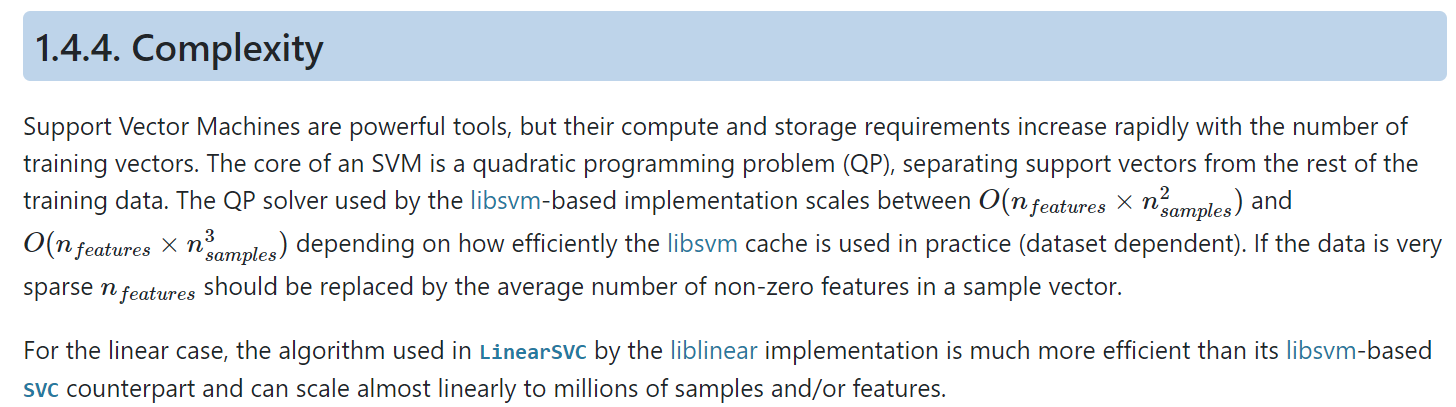

Source - https://scikit-learn.org/stable/modules/svm.html#complexity

### RFC

No scaling required.

#### RandomSearchCV

In [ ]:
RFC_hyperparams_dict = {'n_estimators': np.linspace(start=10, stop=1500, num=10, dtype=int), # Number of trees in random forest
               'max_depth': np.linspace(start=10, stop=100, num=10, dtype=int),
               'n_jobs': [-1], 
               'random_state': [7], # Bootstrapping of samples and sompling of features
               'class_weight': ['balanced'], # Weights associated with classes
               }

# Create model instance
RFC_randomized_search_cv_model = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=RFC_hyperparams_dict, 
                                                    scoring='f1_weighted', n_jobs=-1, cv=5)

# Start time
start_time = time.time()

# Fit the model
fitted_RFC_randomized_search_cv_model = RFC_randomized_search_cv_model.fit(X_train, y_train)

# Save model
save_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_RFC_randomized_search_cv_model.joblib'
dump(fitted_RFC_randomized_search_cv_model, save_path)

# Print time elapsed
print(f'Time elapsed: {(time.time() - start_time)/60:.3f} minutes.')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Time elapsed: 28.207 minutes.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=506,
                       n_jobs=-1, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
0.9400857168609073
0.7144244717289147


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

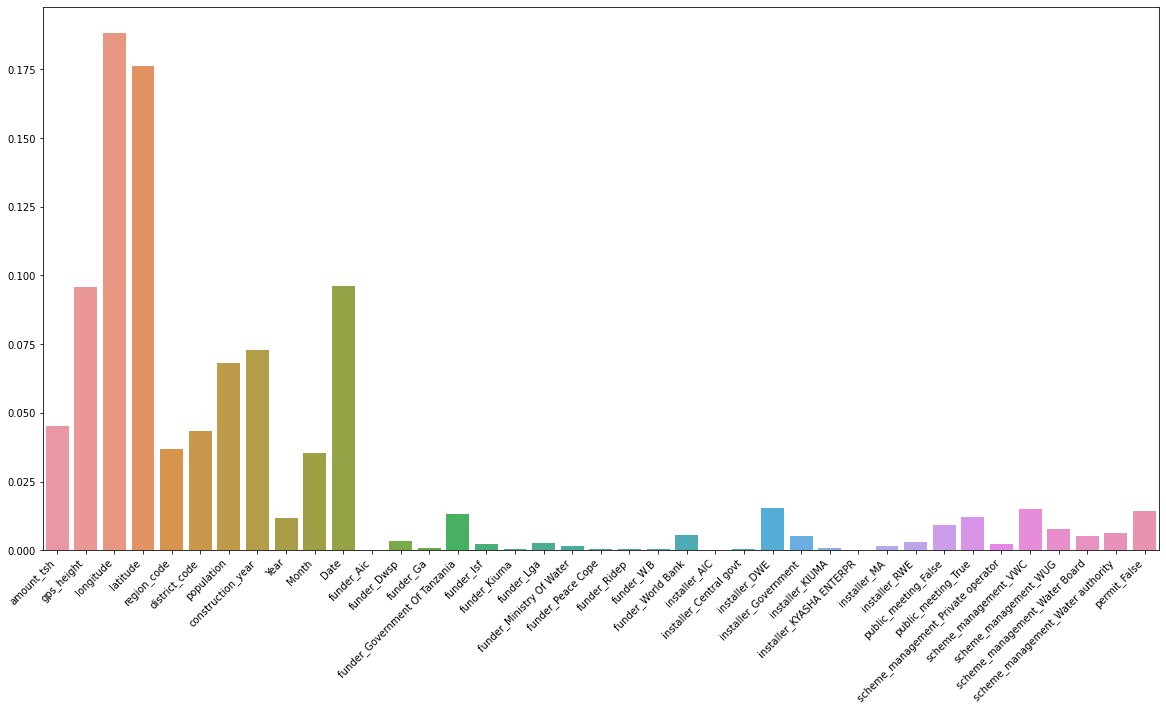

In [ ]:
# Load saved model
saved_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_RFC_randomized_search_cv_model.joblib'
fitted_RFC_randomized_search_cv_model = load(saved_path)

print(fitted_RFC_randomized_search_cv_model.best_estimator_)

y_train_estimated = fitted_RFC_randomized_search_cv_model.best_estimator_.predict(X_train)
f1_score_train = metrics.f1_score(y_train, y_train_estimated, average='weighted')
print(f1_score_train)

y_test_estimated = fitted_RFC_randomized_search_cv_model.best_estimator_.predict(X_test)
f1_score_test = metrics.f1_score(y_test, y_test_estimated, average='weighted')
print(f1_score_test)

feature_importances = fitted_RFC_randomized_search_cv_model.best_estimator_.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(20,10))
sns.barplot(x=feature_names, y=feature_importances)
plt.xticks(rotation=45, ha='right')

Observations:
1. The numerical variables in the data are important.
2. Date, Month and Year columns which were created using feature split are found to be important.
3. Some overfitting observed in the model.

Observations:
1. Compurational time is relatively lower than that in SVC.

### GBC (Gradient Boosting Classifier)

No scaling required.

#### RandomizedSearchCV

In [ ]:
GBC_hyperparams_dict = {
    'learning_rate': [0.01, 0.1, 1, 10],
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 5, 7, 9],
    'random_state': [7],

}

# Create model instance
GBC_randomized_search_cv_model = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                                    param_distributions=GBC_hyperparams_dict)

# Record start time
start_time = time.time()

# Fit model
fitted_GBC_randomized_search_cv_model = GBC_randomized_search_cv_model.fit(X_train, y_train)

# Display time elapsed
print(f'Time elapsed in fitting the model: {(time.time() - start_time)/60:.3f} minutes.')

# Save model
save_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_GBC_randomized_search_cv_model.joblib'
dump(fitted_GBC_randomized_search_cv_model, save_path)

Time elapsed in fitting the model: 49.265 minutes.


['/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_GBC_randomized_search_cv_model.joblib']

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.7670400813729021
0.688256216421854


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

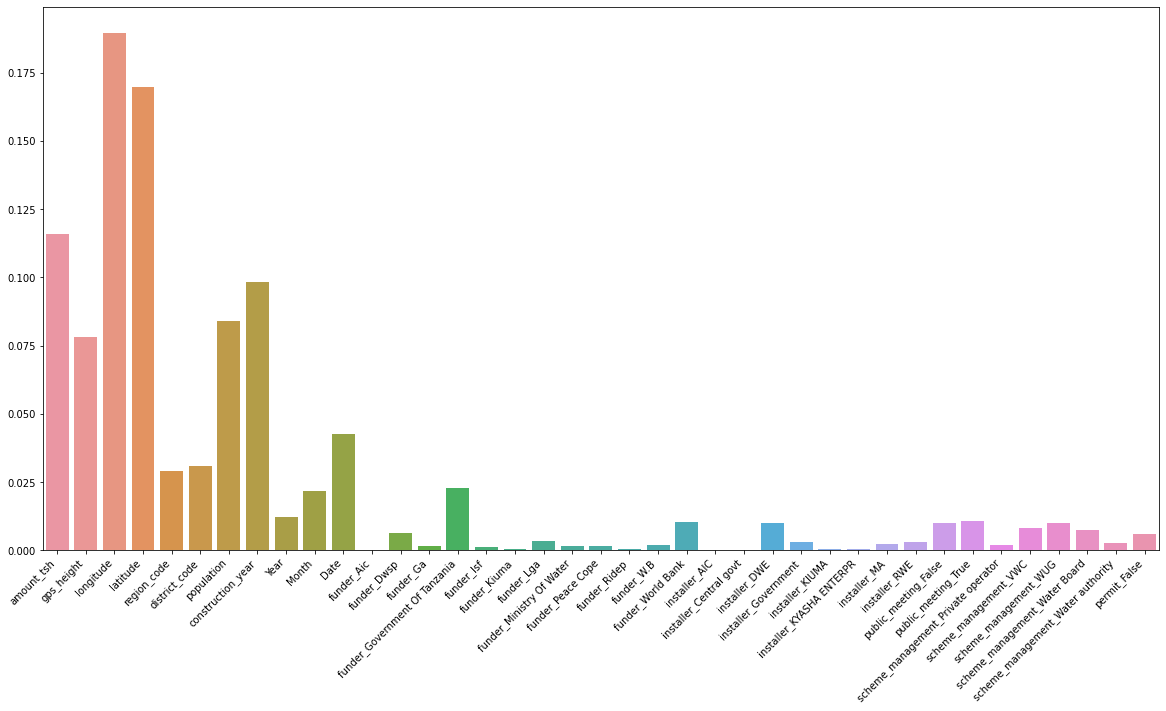

In [ ]:
# Load saved model
saved_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_GBC_randomized_search_cv_model.joblib'
fitted_GBC_randomized_search_cv_model = load(saved_path)

print(fitted_GBC_randomized_search_cv_model.best_estimator_)

y_train_estimated = fitted_GBC_randomized_search_cv_model.best_estimator_.predict(X_train)
f1_score_train = metrics.f1_score(y_train, y_train_estimated, average='weighted')
print(f1_score_train)

y_test_estimated = fitted_GBC_randomized_search_cv_model.best_estimator_.predict(X_test)
f1_score_test = metrics.f1_score(y_test, y_test_estimated, average='weighted')
print(f1_score_test)

feature_importances = fitted_GBC_randomized_search_cv_model.best_estimator_.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(20,10))
sns.barplot(x=feature_names, y=feature_importances)
plt.xticks(rotation=45, ha='right')

### Decision tree with bagging 

This classifier is expected to be faster than the rest, as in this we are bootstrapping by taking samples of the training data points(rows).

Useful resource:
1. https://medium.com/@juniormiranda_23768/ensemble-methods-bagging-and-pasting-in-scikit-learn-723f4183cdf4

In [ ]:
# Create estimator instance
DTC_model = DecisionTreeClassifier(class_weight='balanced')

# Create bagging model instance
DTC_bagging_model = BaggingClassifier(base_estimator=DTC_model, n_jobs=-1)

# Record start time
start_time = time.time()

# Fit model
fitted_DTC_bagging_model = DTC_bagging_model.fit(X_train, y_train)

# Display time elapsed
print(f'Time elapsed in fitting the model: {(time.time() - start_time)/60:.3f} minutes.')

# Save model
save_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_DTC_bagging_model.joblib'
dump(fitted_GBC_randomized_search_cv_model, save_path)

Time elapsed in fitting the model: 0.039 minutes.


['/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_DTC_bagging_model.joblib']

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

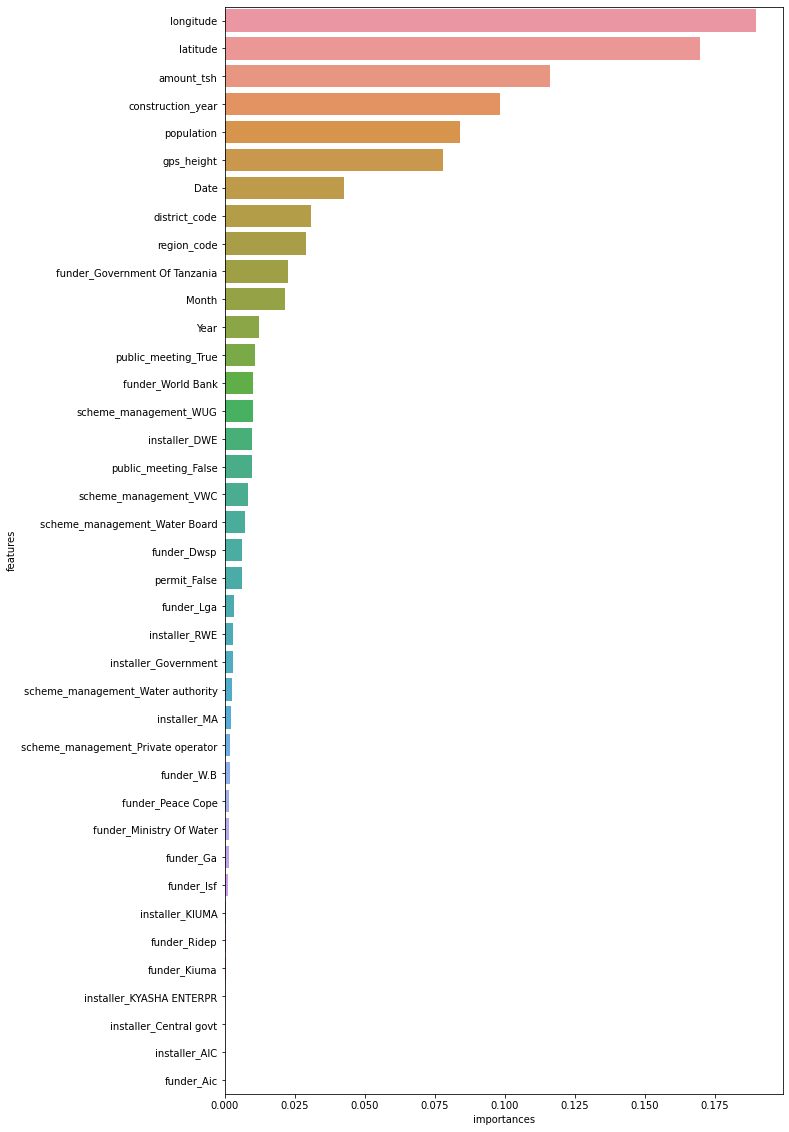

In [ ]:
# Save model
saved_path = r'/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_DTC_bagging_model.joblib'
fitted_DTC_bagging_model = load(saved_path)

print(fitted_DTC_bagging_model)

y_train_estimated = fitted_DTC_bagging_model.predict(X_train)
y_test_estimated = fitted_DTC_bagging_model.predict(X_test)

print(metrics.classification_report(y_train, y_train_estimated))
print(metrics.classification_report(y_test, y_test_estimated))
print(metrics.balanced_accuracy_score(y_train, y_train_estimated))
print(metrics.balanced_accuracy_score(y_test, y_test_estimated))

feature_importances_list = fitted_DTC_bagging_model.best_estimator_.feature_importances_
feature_names = X_train.columns


results_df = pd.DataFrame()
results_df['features'] = feature_names
results_df['importances'] = feature_importances_list

plt.figure(figsize=(10,20))
sns.barplot(data=results_df.sort_values(by='importances', ascending=False), 
            y='features', x='importances')

### XGBoost

Useful resource:
1. https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
2. https://www.kaggle.com/dansbecker/xgboost
3. https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d


In [ ]:
XGBC_hyperparams_dict = {
    'booster': ['gbtree', 'gblinear'], # Tree based models or linear based models
    'eta': [0.001, 0.01, 0.05, 0.1, 1], # Learning rate
    'max_depth': [3, 5, 7, 10]
}

# Create model instance
XGBC_grid_search_cv_model = GridSearchCV(XGBClassifier(), param_grid=XGBC_hyperparams_dict, scoring='f1_weighted', n_jobs=-1)

# Record start time
start_time = time.time()

# Fit model
fitted_XGBC_grid_search_cv_model = XGBC_grid_search_cv_model.fit(X_train, y_train)

# Save model
save_path = r'/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_XGBC_grid_search_cv_model.joblib'
dump(XGBC_grid_search_cv_model, save_path)

# Display time elapsed
print(f'Time elapsed in fitting the model: {(time.time() - start_time)/60:.3f} minutes.')

Time elapsed in fitting the model: 32.323 minutes.


#### Trained model (without hyper-parameter tunning)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
              precision    recall  f1-score   support

           0       0.67      0.85      0.75     20626
           1       0.68      0.07      0.13      2725
           2       0.67      0.53      0.60     14516

    accuracy                           0.67     37867
   macro avg       0.67      0.49      0.49     37867
weighted avg       0.67      0.67      0.65     37867

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      3568
           1       0.62      0.08      0.1

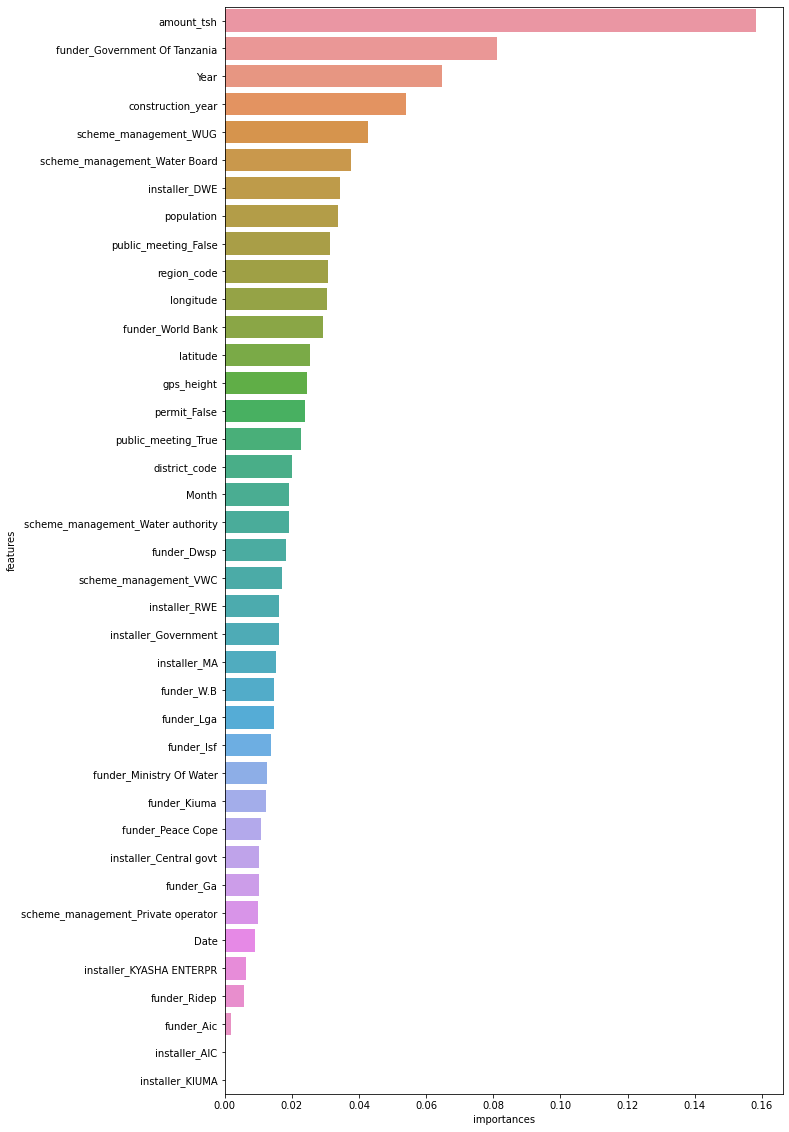

In [ ]:
# Save model
saved_path = r'/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_XGBC_model.joblib'
fitted_XGBC_model = load(saved_path)

print(fitted_XGBC_model)

y_train_estimated = fitted_XGBC_model.predict(X_train)
y_test_estimated = fitted_XGBC_model.predict(X_test)

print(metrics.classification_report(y_train, y_train_estimated))
print(metrics.classification_report(y_test, y_test_estimated))
print(metrics.balanced_accuracy_score(y_train, y_train_estimated))
print(metrics.balanced_accuracy_score(y_test, y_test_estimated))

feature_importances_list = fitted_XGBC_model.feature_importances_
feature_names = X_train.columns


results_df = pd.DataFrame()
results_df['features'] = feature_names
results_df['importances'] = feature_importances_list

plt.figure(figsize=(10,20))
sns.barplot(data=results_df.sort_values(by='importances', ascending=False), 
            y='features', x='importances')


#### Optimized model (with hyperparameter tunning)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'eta': [0.01, 0.05, 0.1, 1.5, 2],
                         'max_depth': [3, 5, 7, 10]},
    

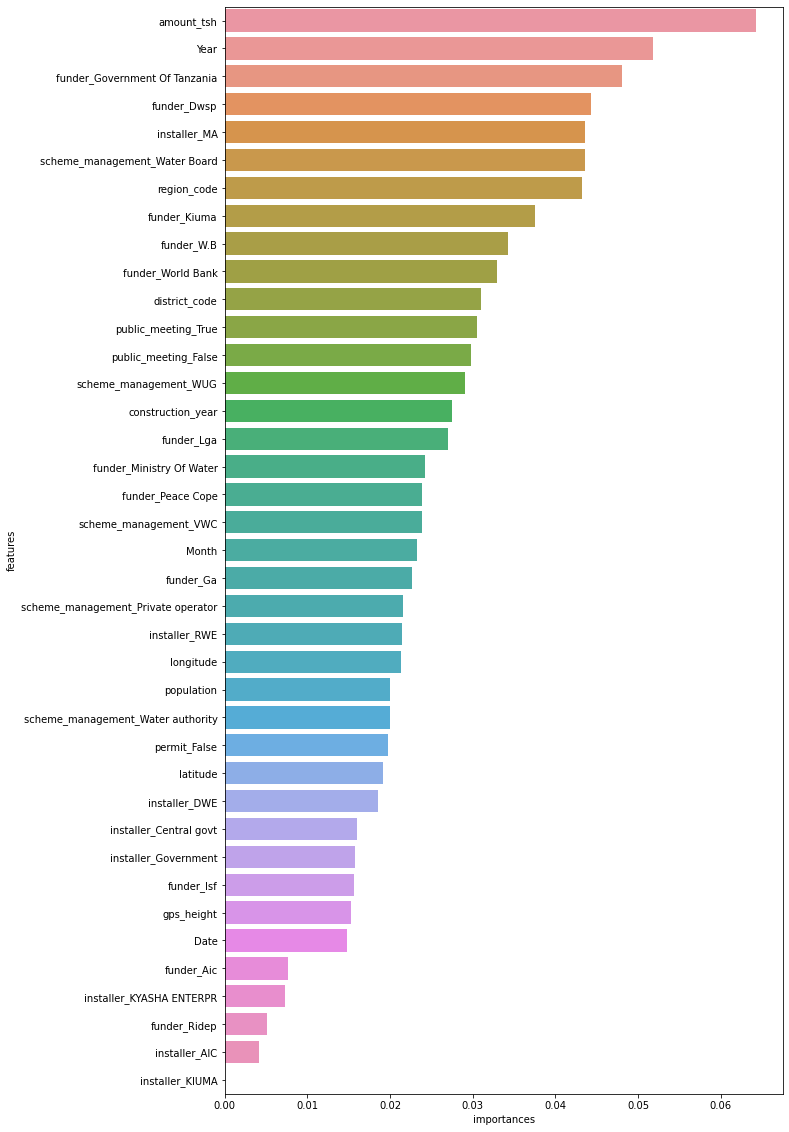

In [ ]:
# Save model
saved_path = r'/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_XGBC_grid_search_cv_model.joblib'
fitted_XGBC_grid_search_cv_model = load(saved_path)

print(fitted_XGBC_grid_search_cv_model)

y_train_estimated = fitted_XGBC_grid_search_cv_model.predict(X_train)
y_test_estimated = fitted_XGBC_grid_search_cv_model.predict(X_test)

print(metrics.classification_report(y_train, y_train_estimated))
print(metrics.classification_report(y_test, y_test_estimated))
print(metrics.balanced_accuracy_score(y_train, y_train_estimated))
print(metrics.balanced_accuracy_score(y_test, y_test_estimated))

feature_importances_list = fitted_XGBC_grid_search_cv_model.best_estimator_.feature_importances_
feature_names = X_train.columns


results_df = pd.DataFrame()
results_df['features'] = feature_names
results_df['importances'] = feature_importances_list

plt.figure(figsize=(10,20))
sns.barplot(data=results_df.sort_values(by='importances', ascending=False), 
            y='features', x='importances')


Observations:
1. Increased balanced accuracy and weighted F-1 score on both train and test data by hyper-parameter tunning.

### T-sne

In [ ]:
def visusalize_TSNE_2D_embedding(X_data_df, predicted_cluster_labels_series, random_state=7):
    """
    - Tejas Chaudhari
    """

    # Get T-sne 2D embedding for visualization
    # Create T-sne model instance
    TSNE_model = TSNE(n_components=2, random_state=random_state, n_jobs=-1)

    # Fit and embed the data
    TSNE_embedded_data_array = TSNE_model.fit_transform(X_data_df)

    # Conver to dataframe
    TSNE_embedded_data_df = pd.DataFrame(data=TSNE_embedded_data_array, columns=['Embedded feature 1', 'Embedded feature 2'],
                                            index=X_data_df.index)
    
    # Create figure and axes array
    figure, axes_array = plt.subplots(1, 1, figsize=(10, 5))

    # Visualize train data clusters
    sns.scatterplot(data=TSNE_embedded_data_df.assign(predicted_cluster_labels=predicted_cluster_labels_series),
                    x='Embedded feature 1', y='Embedded feature 2', hue='predicted_cluster_labels', s=100,
                    palette='tab10', style='predicted_cluster_labels', ax=axes_array)
    axes_array.legend(markerscale=1.25)
    plt.show()

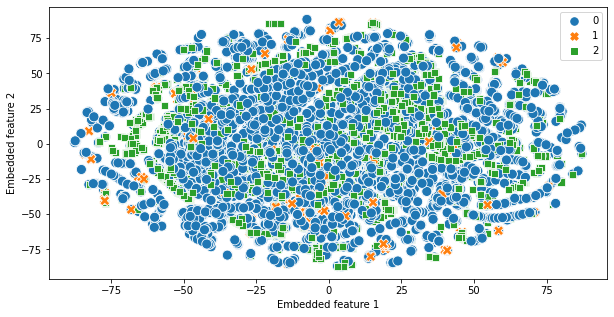

In [ ]:
visusalize_TSNE_2D_embedding(X_train, y_train_estimated)

Observations:
1. Data seems to be completely overlapped. KNN might be a nice model to try. Logistic regression would definitely not work.

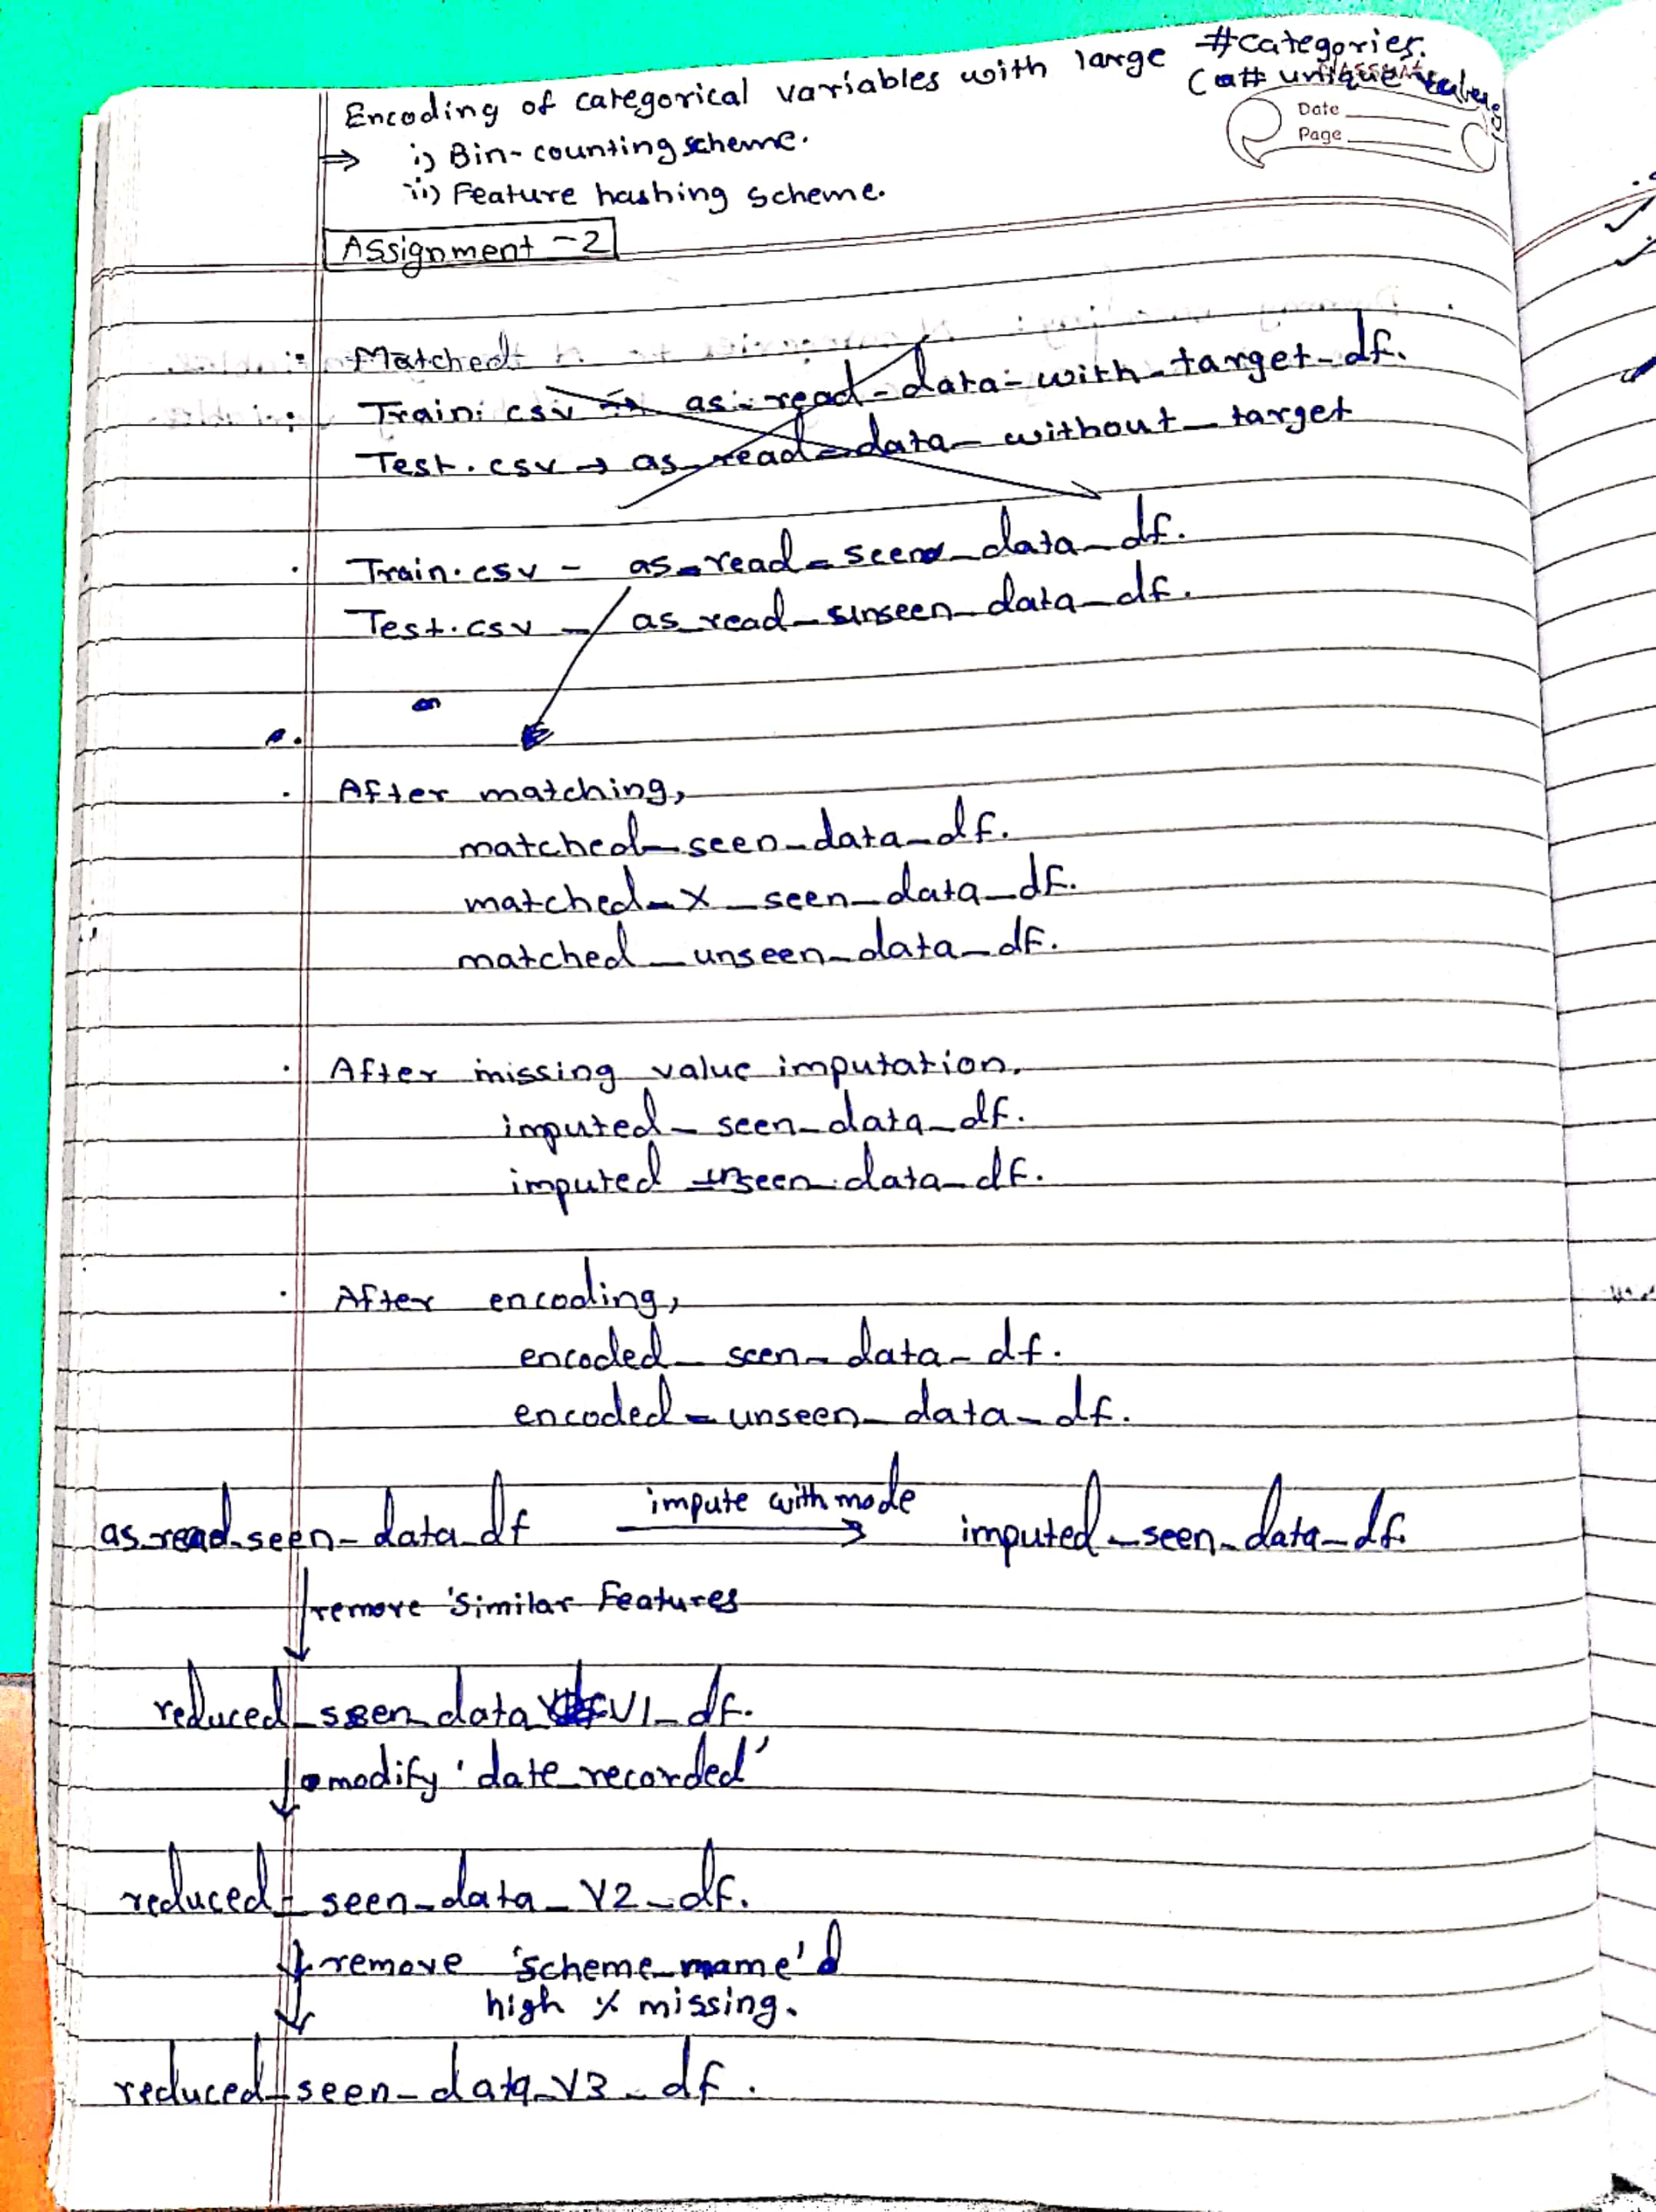


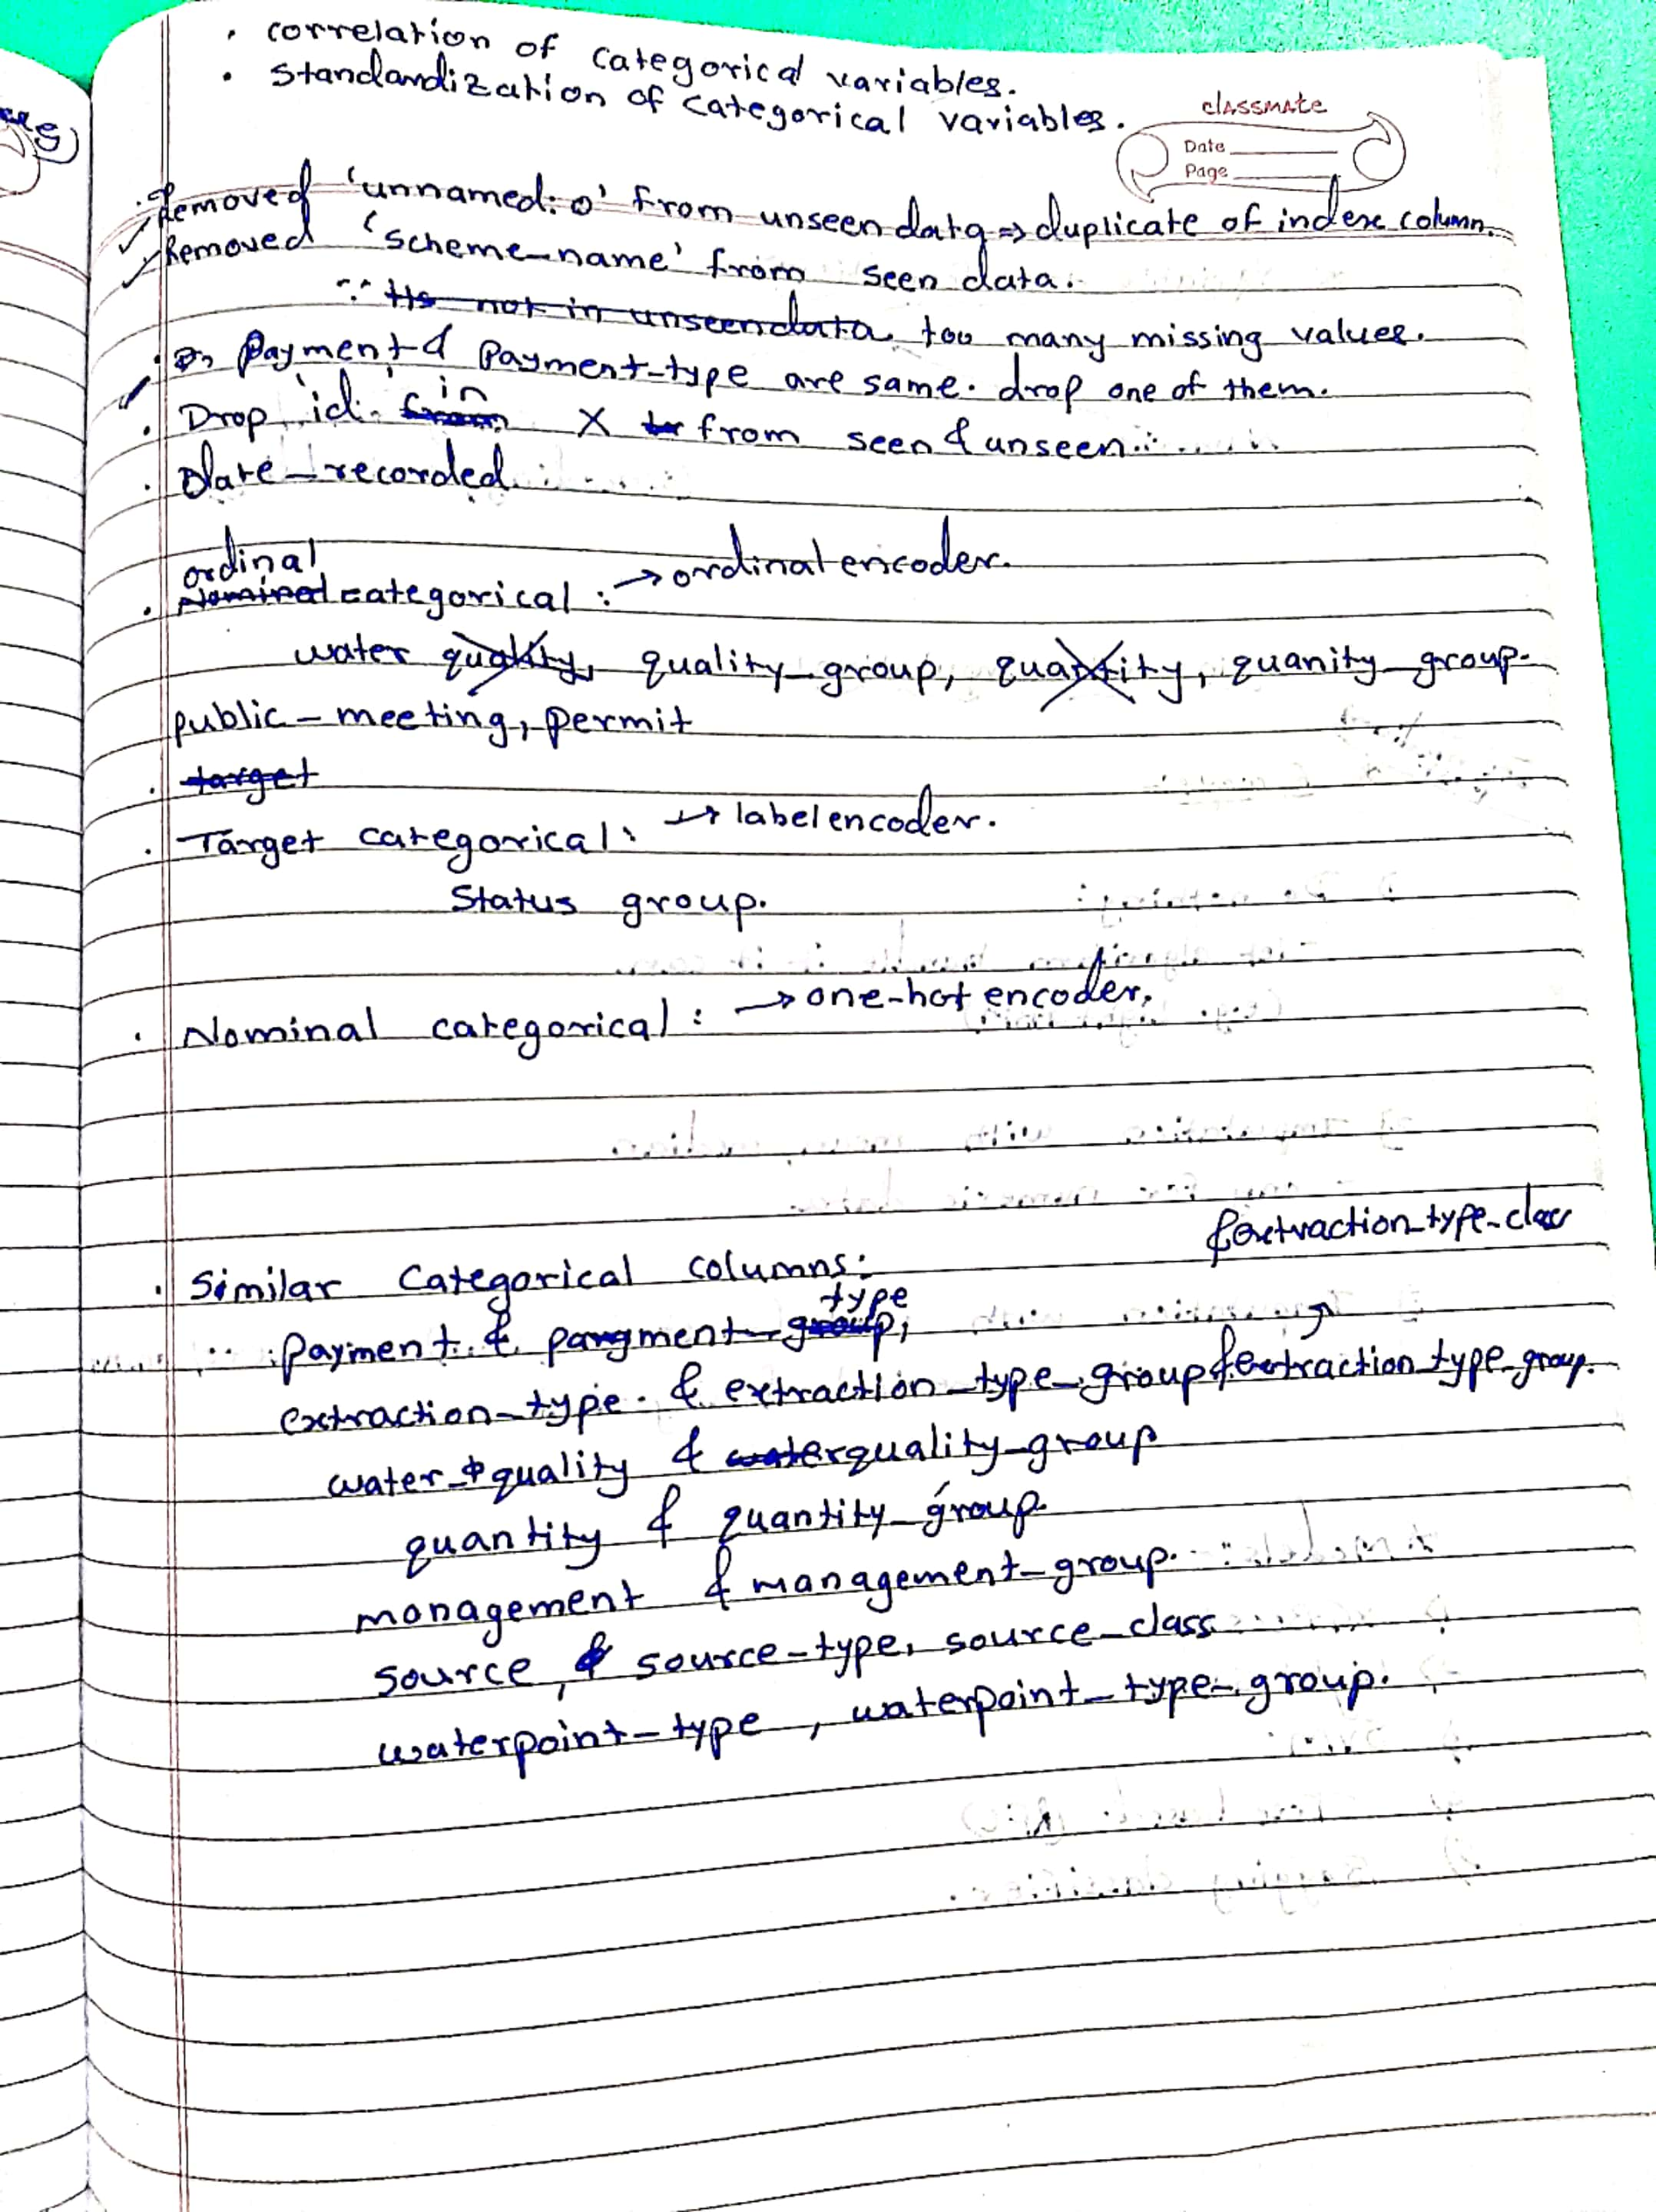


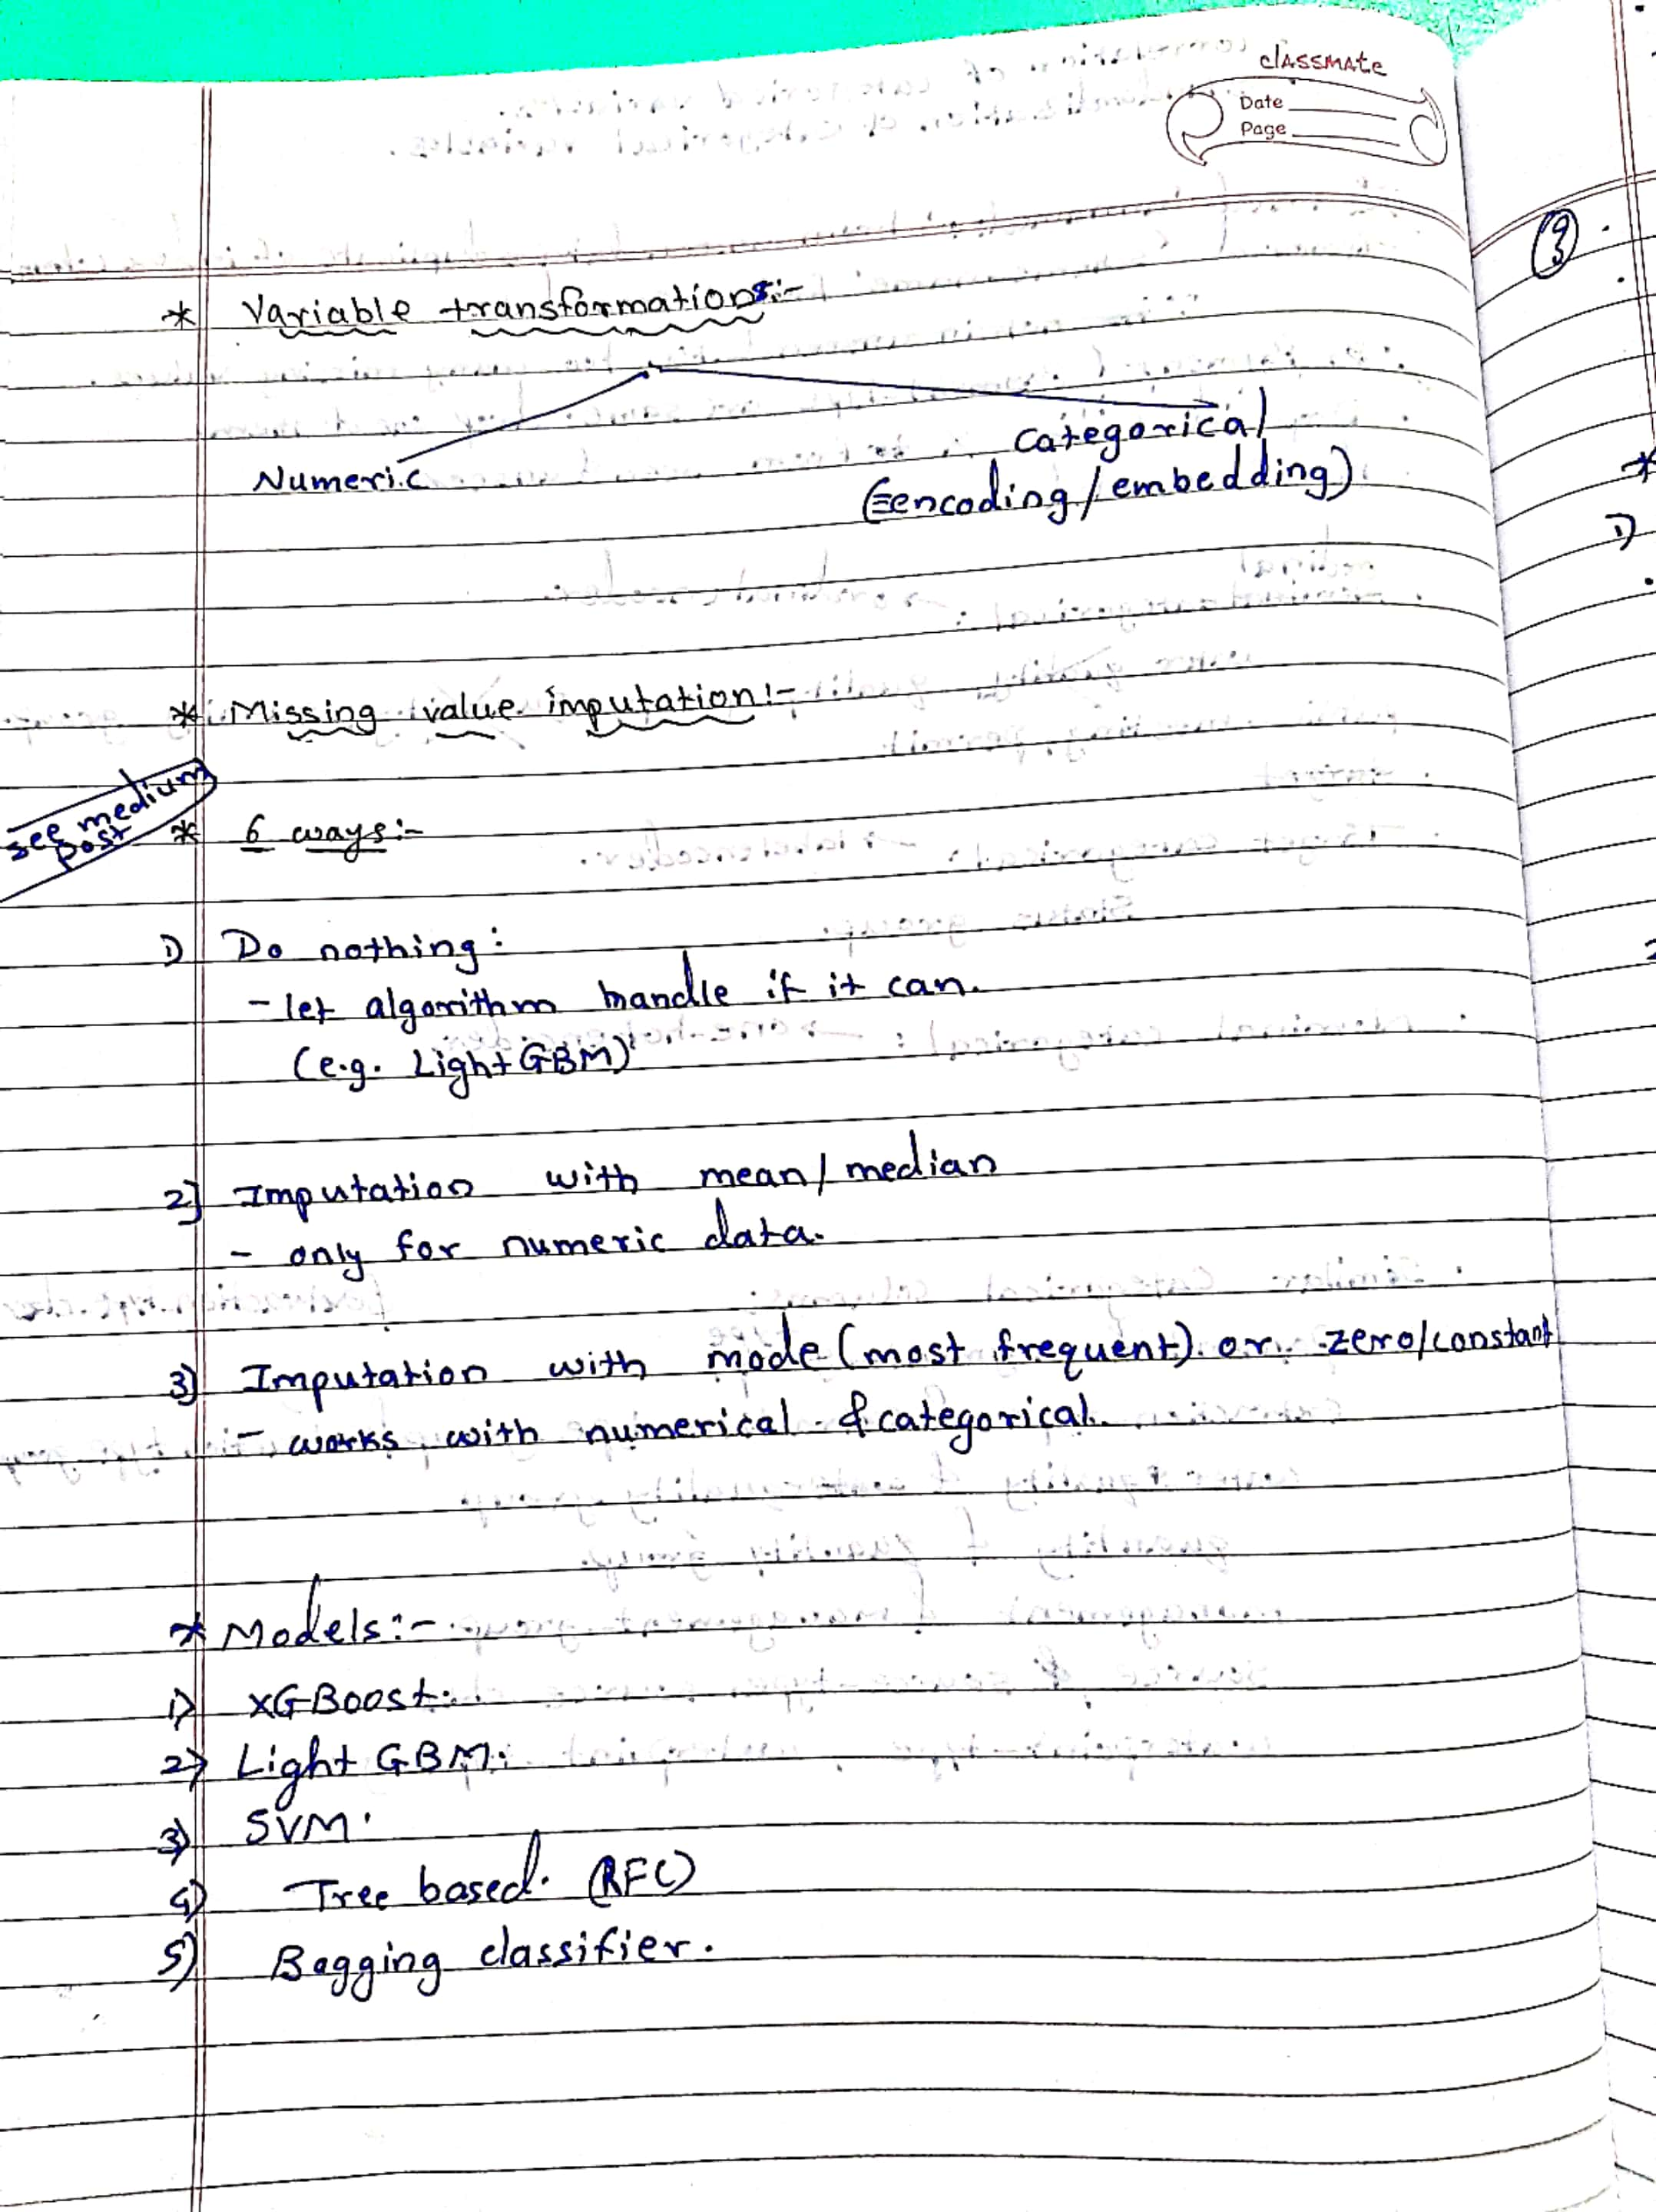


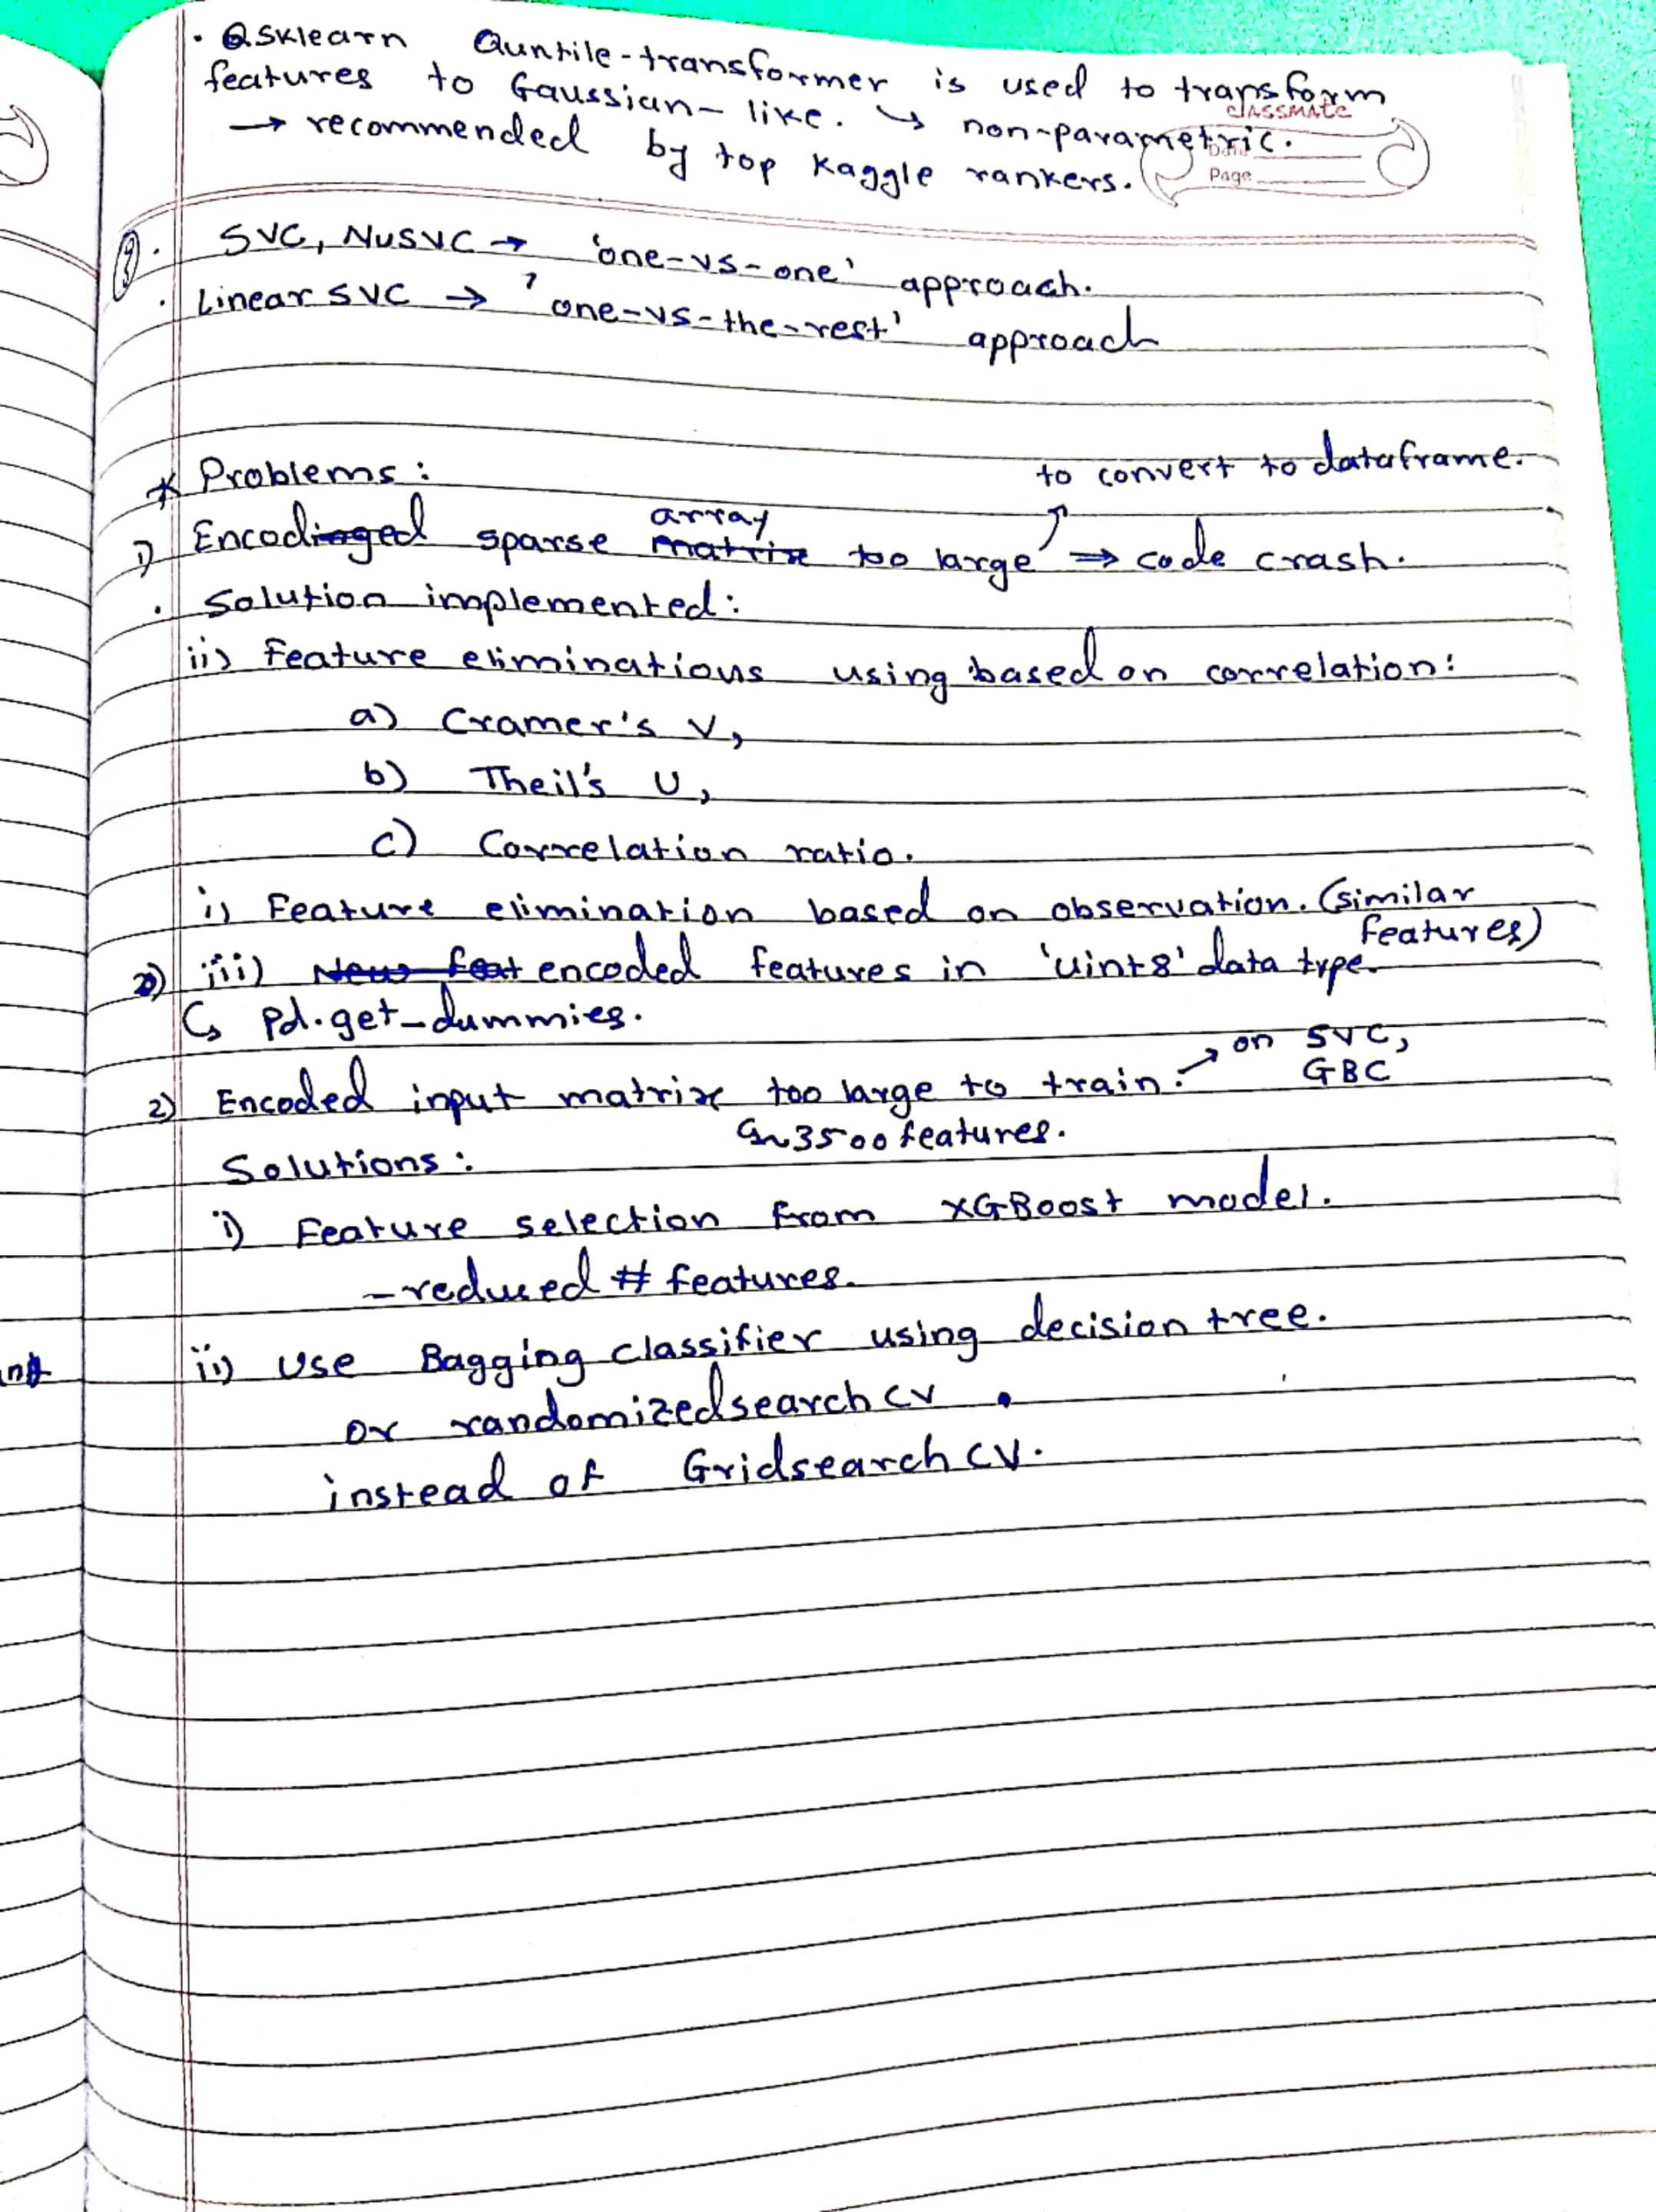

# Temporary trial of RFC

In [ ]:
temp_df = pd.get_dummies(reduced_seen_data_v8_df.drop(columns='status_group', inplace=False))
display(temp_df)
display(temp_df.dtypes.value_counts())
temp_df.isna().any().value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

num_df = as_read_seen_data_df.select_dtypes('int64', 'float64').drop(columns='id', inplace=False)
std_num_df = pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)
temp_df.update(std_num_df)
# Scaling is not necessary for random forest


X_train, X_test, y_train, y_test = train_test_split(temp_df, encoded_seen_data_v2_df['status_group'], test_size=0.15, random_state=7)

# Copied code
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



model = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
fitted_model = model.fit(X_train, y_train)
y_pred = fitted_model.predict(X_test)
print(y_pred)

In [ ]:
y_pred = pd.Series(y_pred)
print(y_pred.to_list())
print(y_test.to_list())
metric = metrics.balanced_accuracy_score(y_test.to_list(), y_pred.to_list())

print(metric)

In [ ]:
asd_df = as_read_seen_data_df.select_dtypes('int64', 'float64').drop(columns='id', inplace=False)
display(asd_df)
display(temp_df[asd_df.columns])

In [ ]:
feature_importances = fitted_model.feature_importances_

# Additional trials

### Using recursive feature elimination with cross validation

We will use the following
1. base estimator - random forest classifier
2. statified K-fold cross validation
3. weighted f1-sore scoring for optimization


Useful resource:
1. https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

Note: 
1. Standardization is not required for tree based models

#### Using Random forest

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Create base estimator model instance
RFC_base_estimator_model = RandomForestClassifier(max_samples=0.4, # fraction of bag (fraction of training samples)
                                                  class_weight='balanced') # For imbalanced classification


# Create model instance
RFC_RFECV_selector_model = RFECV(estimator=RFC_base_estimator_model, step=1, cv=StratifiedKFold(10),
                                 scoring='f1_weighted', n_jobs=-1)

# Fit the model
fitted_RFC_RFECV_selector_model = RFC_RFECV_selector_model.fit(encoded_X_data_df, encoded_y_data_series)


KeyboardInterrupt: ignored